<a id='Index'></a>

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Index </h1></span>

Section List

<a href='#Import-Libraries'> 1. Import Libraries + Settings</a>

<a href='#Load-Data'> 2. Load Data </a>

<a href='#DT-pruning'> 3. Decision Tree (DT) Classifier </a>

<a href='#Boosting'> 4. Gradient Boosted DT  </a>

<a href='#MLP'> 5. Multi-layer Perceptrons </a>

<a href='#kNN'> 6. k-Nearest Neighbors </a>

<a href='#SVC'> 7. C-Support Vector Classifier  </a>





<a id='Import-Libraries'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Import Libraries </h1></span>
<a href='#Index'> Back to Index</a>

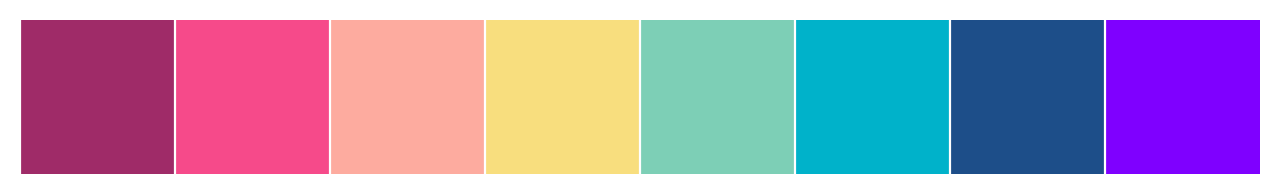

In [1]:
import os
os.environ["dataset"] = "credit_card"

# read raw input
import json

# dataframe manipulation
import pandas as pd 
import numpy as np
import re

# metric
from sklearn.metrics import log_loss, confusion_matrix

# validation curve and learning curve
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import validation_curve, learning_curve, HalvingGridSearchCV

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from utils import *

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# other stuff
import os
import time
import csv
import random
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

np.random.seed(888) # set seed to split data into training and testing later.

# set stype
plt.style.use("seaborn-darkgrid")
%config InlineBackend.figure_format = 'retina'
my_palette = ['#9F2B68', '#f64a8a', '#fdab9f', '#F8DE7E', '#7dcfb6', '#00b2ca', '#1d4e89', '#7F00FF'] 
sns.set_palette(palette=my_palette)
sns.palplot(sns.color_palette(my_palette))

<a id='Load-Data'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Loading Data </h1></span>
<a href='#Index'> Back to Index</a>

In [2]:
### Load Data
DATA_PATH = "datasets/processed/credit_card/"

train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
display(train_df.head())
display(test_df.head())

# Split labels from dataframe
X_train = train_df.loc[:, train_df.columns != 'label']
y_train = train_df['label']

X_test = test_df.loc[:, test_df.columns != 'label']
y_test = test_df['label']

# DICTIONARY FOR TUNED MODEL PERFORMANCE COMPARISON
MODEL_RES = {"model_name": [], "metric_score": [], "params": [], "train_time": [], "infer_time":[]}

x1   x2   x3   x4    x5   x6   x7   x8   x9  x10  ...      x15  \
0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
1  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
2   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
3   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
4   50000.0  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   

       x16      x17     x18      x19      x20     x21     x22     x23  label  
0      0.0      0.0     0.0    689.0      0.0     0.0     0.0     0.0      1  
1   3455.0   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0      1  
2  14948.0  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0      0  
3  28959.0  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0      0  
4  19146.0  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0      0  

[5 rows x 24 columns]

x1   x2   x3   x4    x5   x6   x7   x8   x9  x10  ...      x15  \
0   50000.0  2.0  1.0  2.0  26.0  1.0  2.0  0.0  0.0  0.0  ...  39475.0   
1  310000.0  1.0  2.0  1.0  42.0 -2.0 -2.0 -2.0 -2.0 -2.0  ...   3057.0   
2  300000.0  2.0  2.0  1.0  34.0 -2.0 -2.0 -2.0 -2.0 -2.0  ...   2014.0   
3  340000.0  2.0  2.0  1.0  40.0  0.0  0.0  0.0  0.0  0.0  ...  46708.0   
4  500000.0  2.0  2.0  2.0  33.0 -2.0 -1.0  0.0  0.0 -2.0  ...  50058.0   

       x16      x17      x18      x19     x20     x21     x22     x23  label  
0  40187.0  40992.0   2200.0   1962.0  1562.0  1500.0  1474.0  2300.0      0  
1   2538.0   3069.0   4206.0   1858.0  3057.0  2538.0  3069.0  6591.0      1  
2   -185.0   1815.0      0.0      0.0  2100.0     0.0  2000.0  5000.0      0  
3  49912.0  52102.0   3171.0   3000.0  2000.0  4000.0  3000.0  2100.0      0  
4  35036.0   4757.0  18641.0  75207.0  5100.0  5089.0   118.0  1647.0      0  

[5 rows x 24 columns]

In [3]:
# get a value counts of training_data label distribution
display(y_train.value_counts())

0    21061
1     5939
Name: label, dtype: int64

In [41]:
X_train.shape, X_test.shape

((27000, 23), (3000, 23))

<a id='DT-pruning'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Decision Tree (DT) classifier </h1></span>
<a href='#Index'> Back to Index</a>

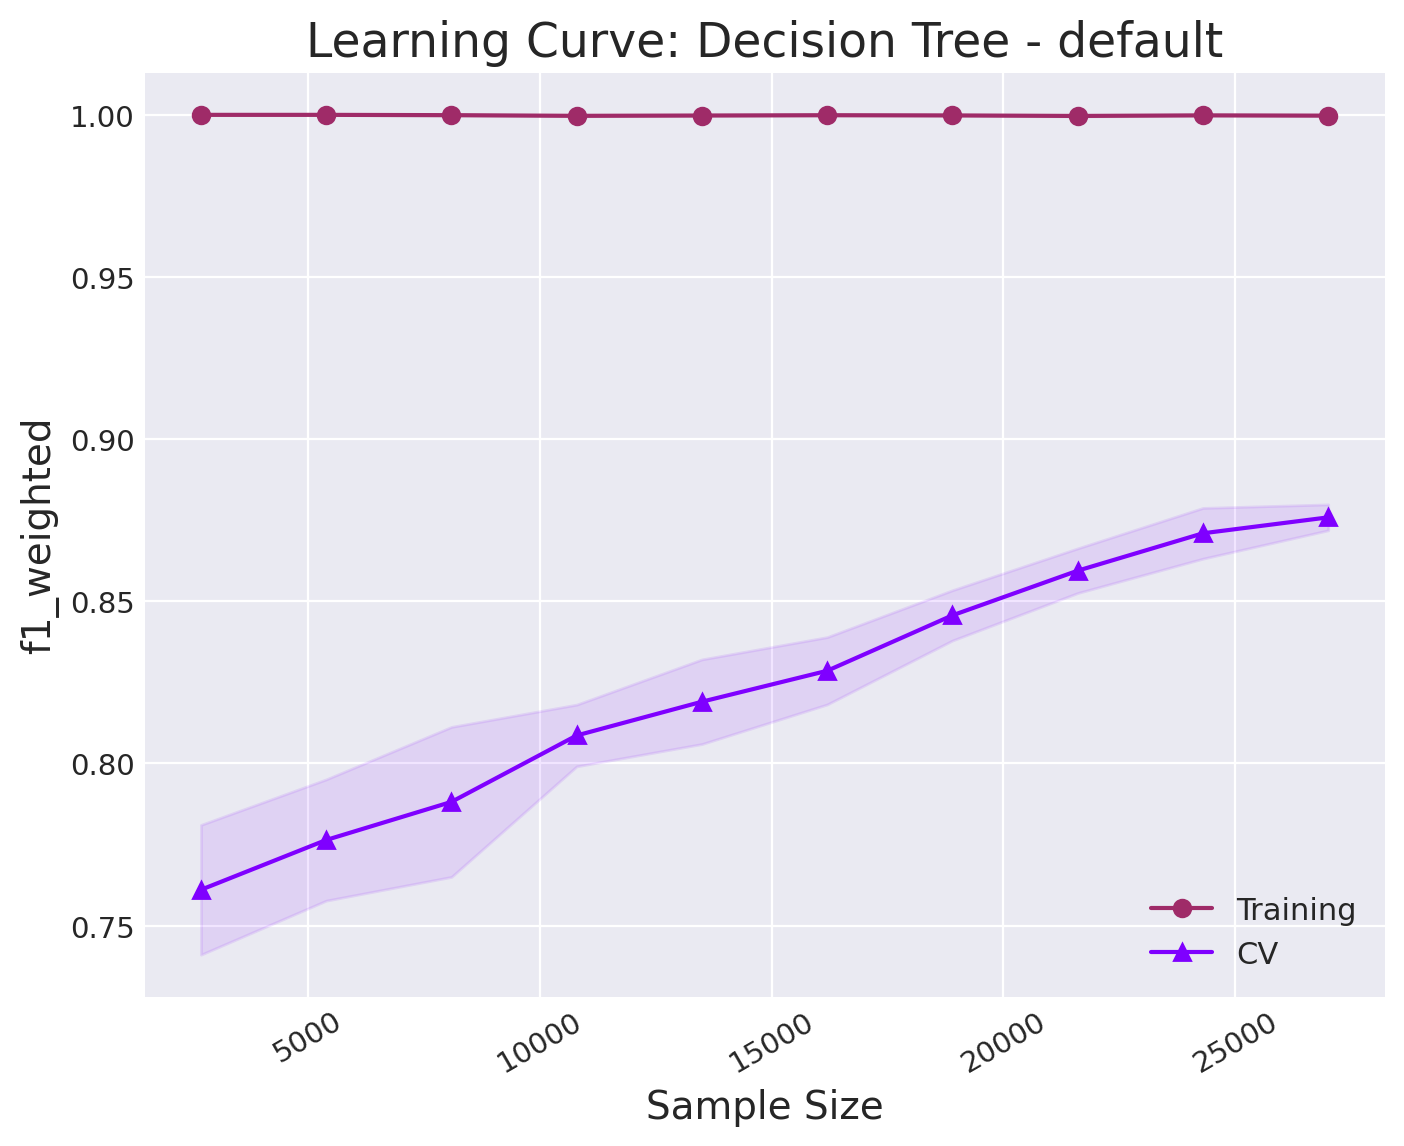

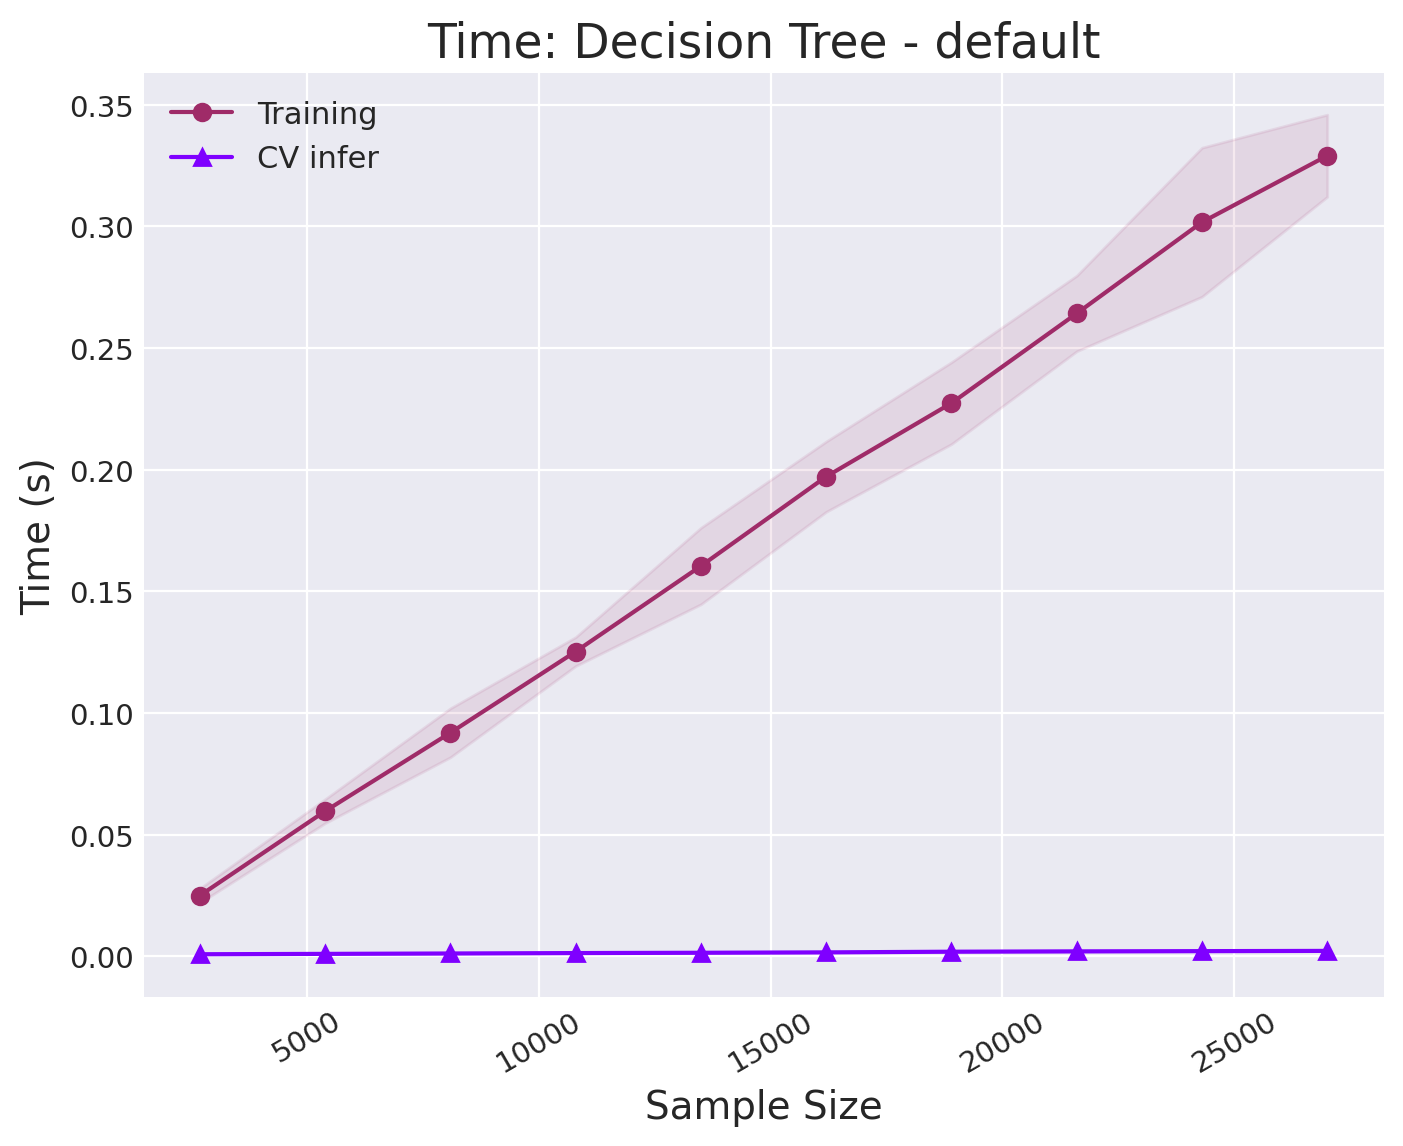

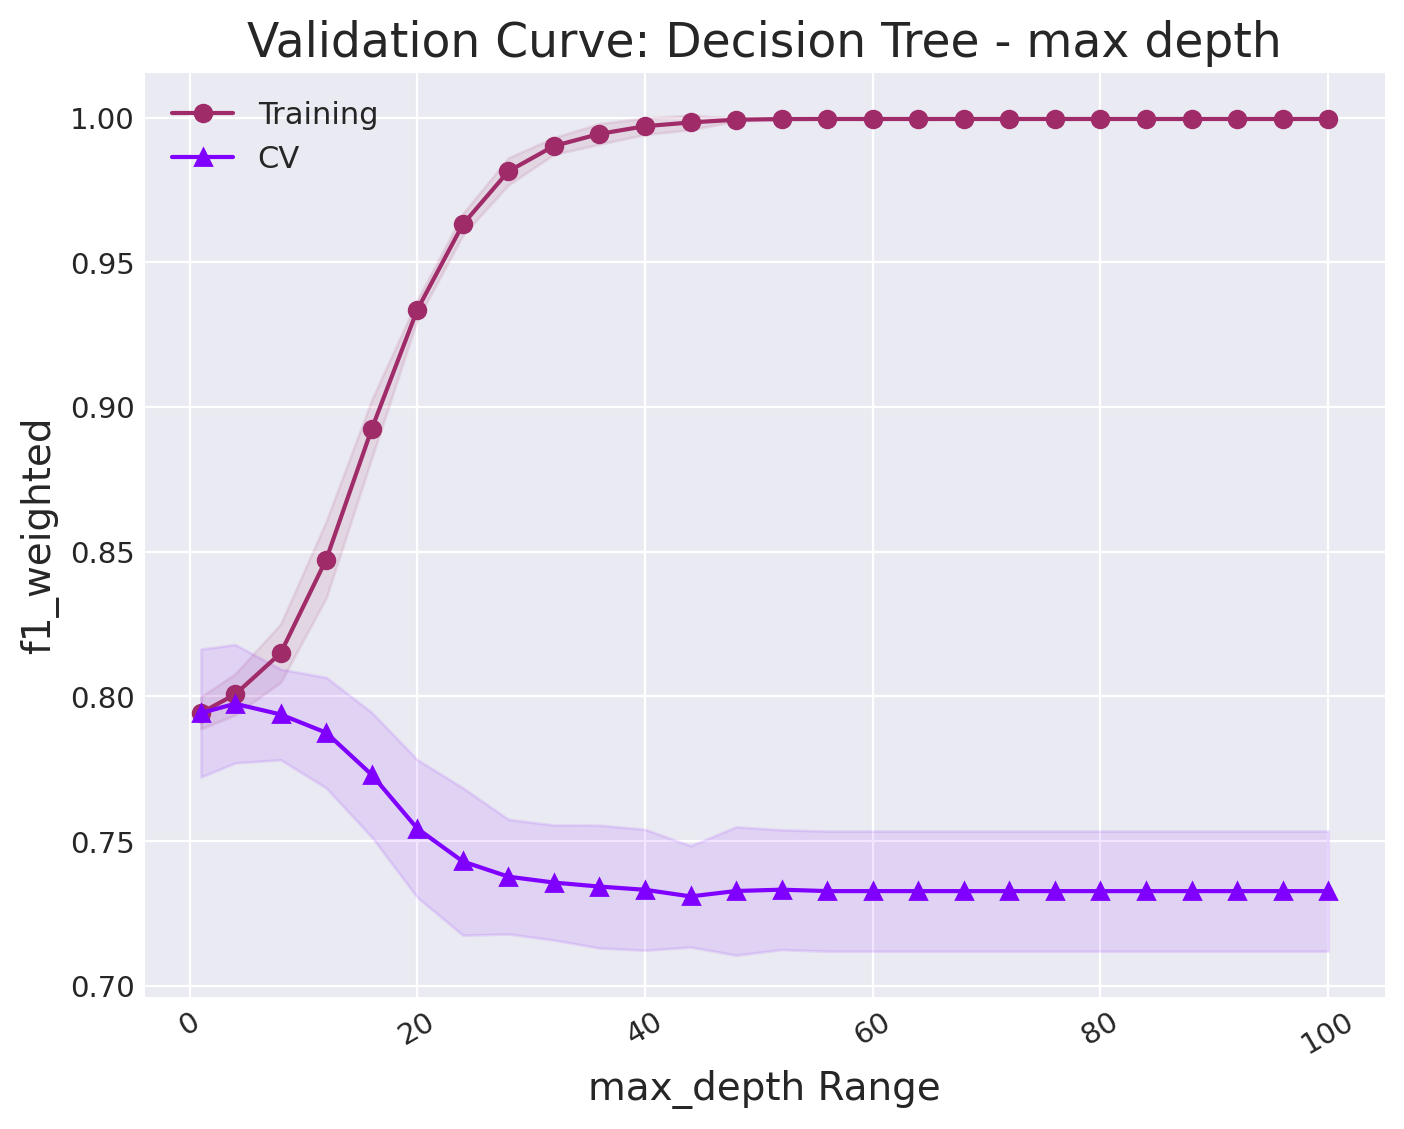

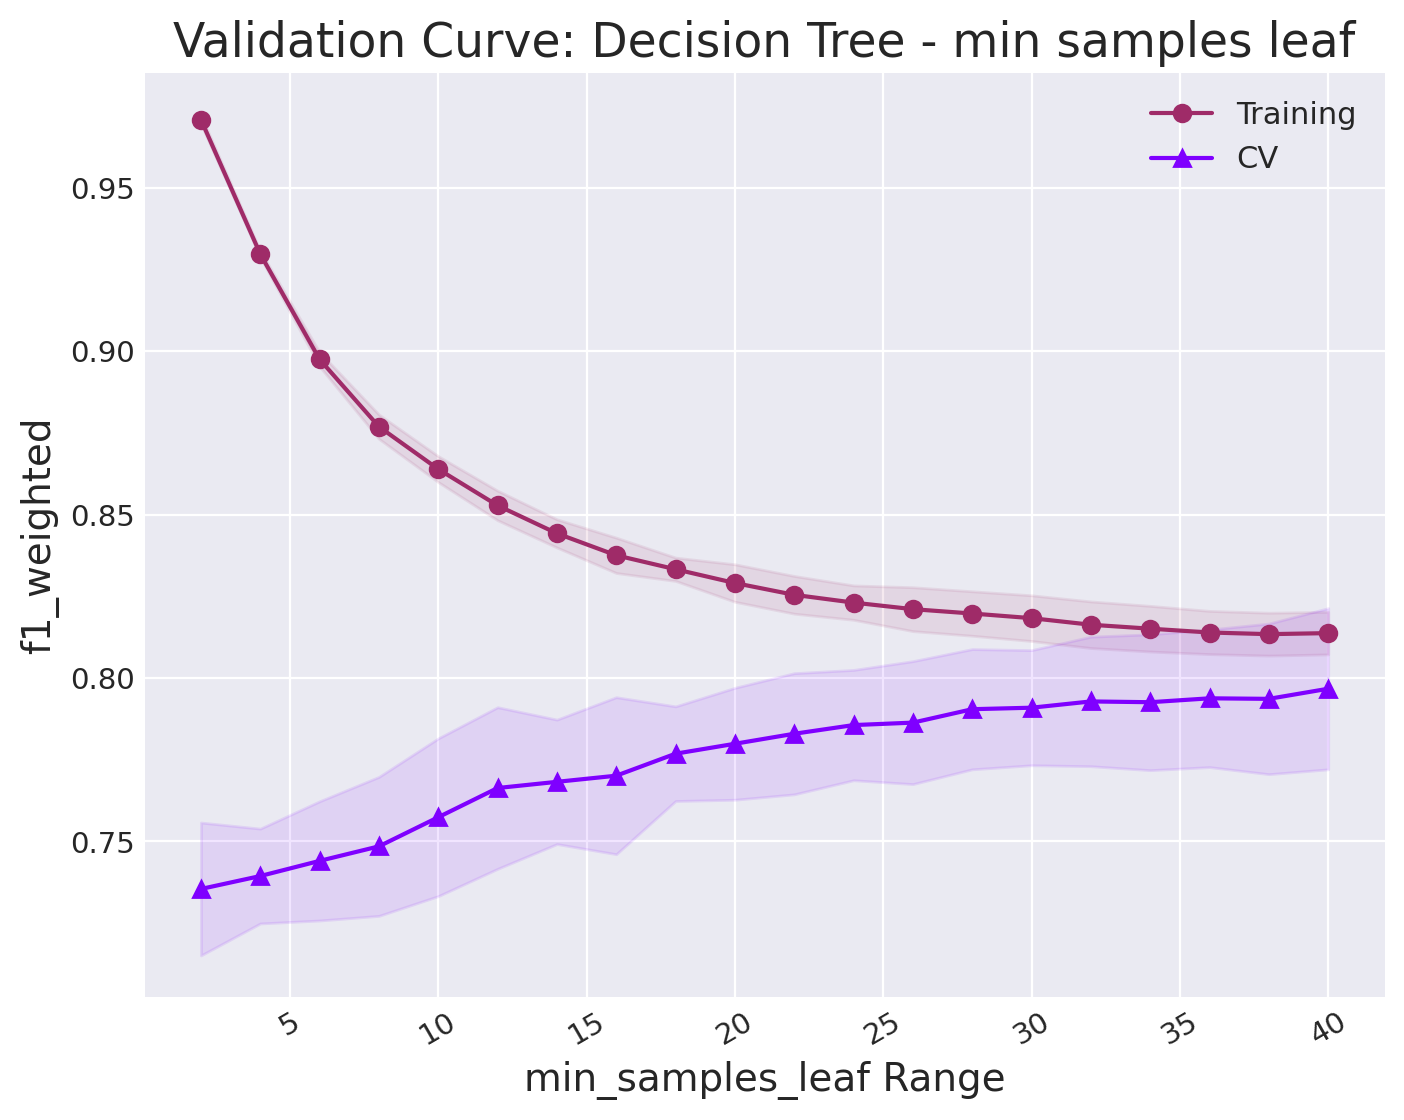

CPU times: user 1min 31s, sys: 1.09 s, total: 1min 32s
Wall time: 1min 31s


In [4]:
%%time
# experiment with max_depth and min sample leaf
max_depth_range = list(range(0, 101, 4))
max_depth_range[0] = 1
min_sample_leaf_range = list(range(2,42,2))
train_sizes = np.linspace(0.1, 1, 10)

clf = DecisionTreeClassifier(random_state=888, criterion="log_loss")

# plot Learning curve for the default DT
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="Decision Tree - default"
)

# experiment with max depth
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='max_depth',
    param_range=max_depth_range,
    metric="f1_weighted",
    title="Decision Tree - max depth"
)

# experiment with min samples in leaf node
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='min_samples_leaf',
    param_range=min_sample_leaf_range,
    metric="f1_weighted",
    title="Decision Tree - min samples leaf"
)

In [5]:
%%time
# optimize the decision tree by searching max_depth between 10 and 40, min samples leaf between 5 and 20
param_grid = {
    'min_samples_leaf': range(10,41), 
    'max_depth': range(5, 20)
    }

tuned_dt_clf = HalvingGridSearchCV(
   estimator = DecisionTreeClassifier(random_state=888),
   param_grid=param_grid,
   cv=5,
   factor=2
   )
tuned_dt_clf.fit(X_train, y_train)
print("With HalvingGridSearchCV, best parameters are: \n", tuned_dt_clf.best_params_)

With HalvingGridSearchCV, best parameters are: 
 {'max_depth': 5, 'min_samples_leaf': 38}
CPU times: user 19.7 s, sys: 9.68 ms, total: 19.7 s
Wall time: 19.7 s


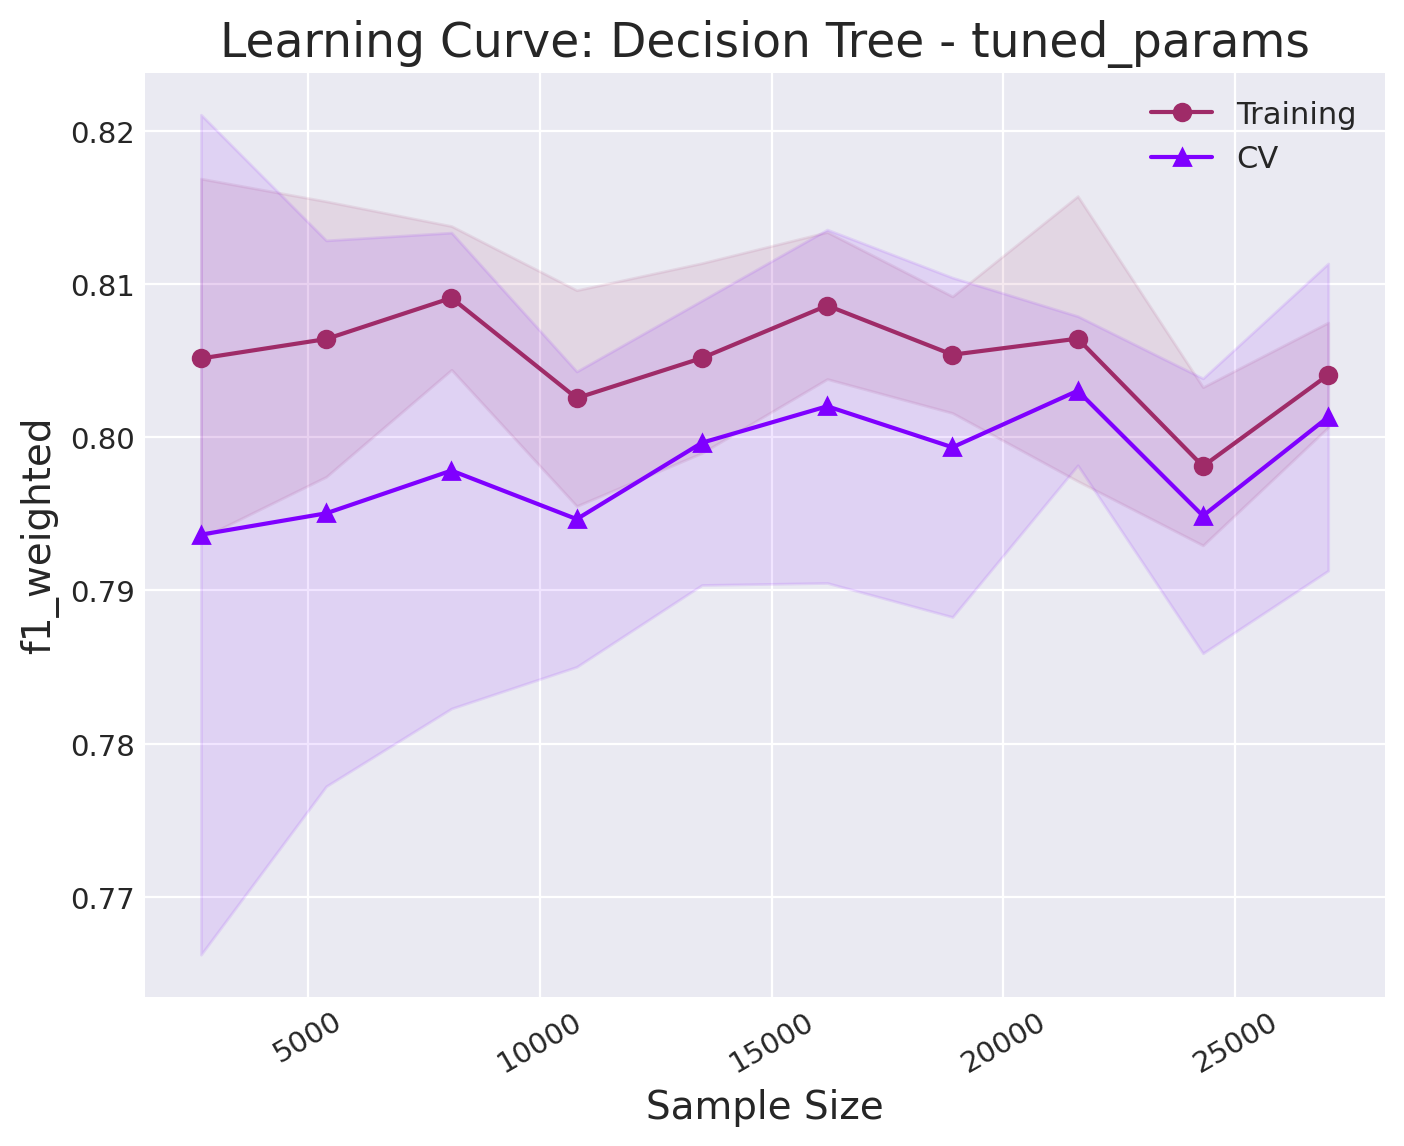

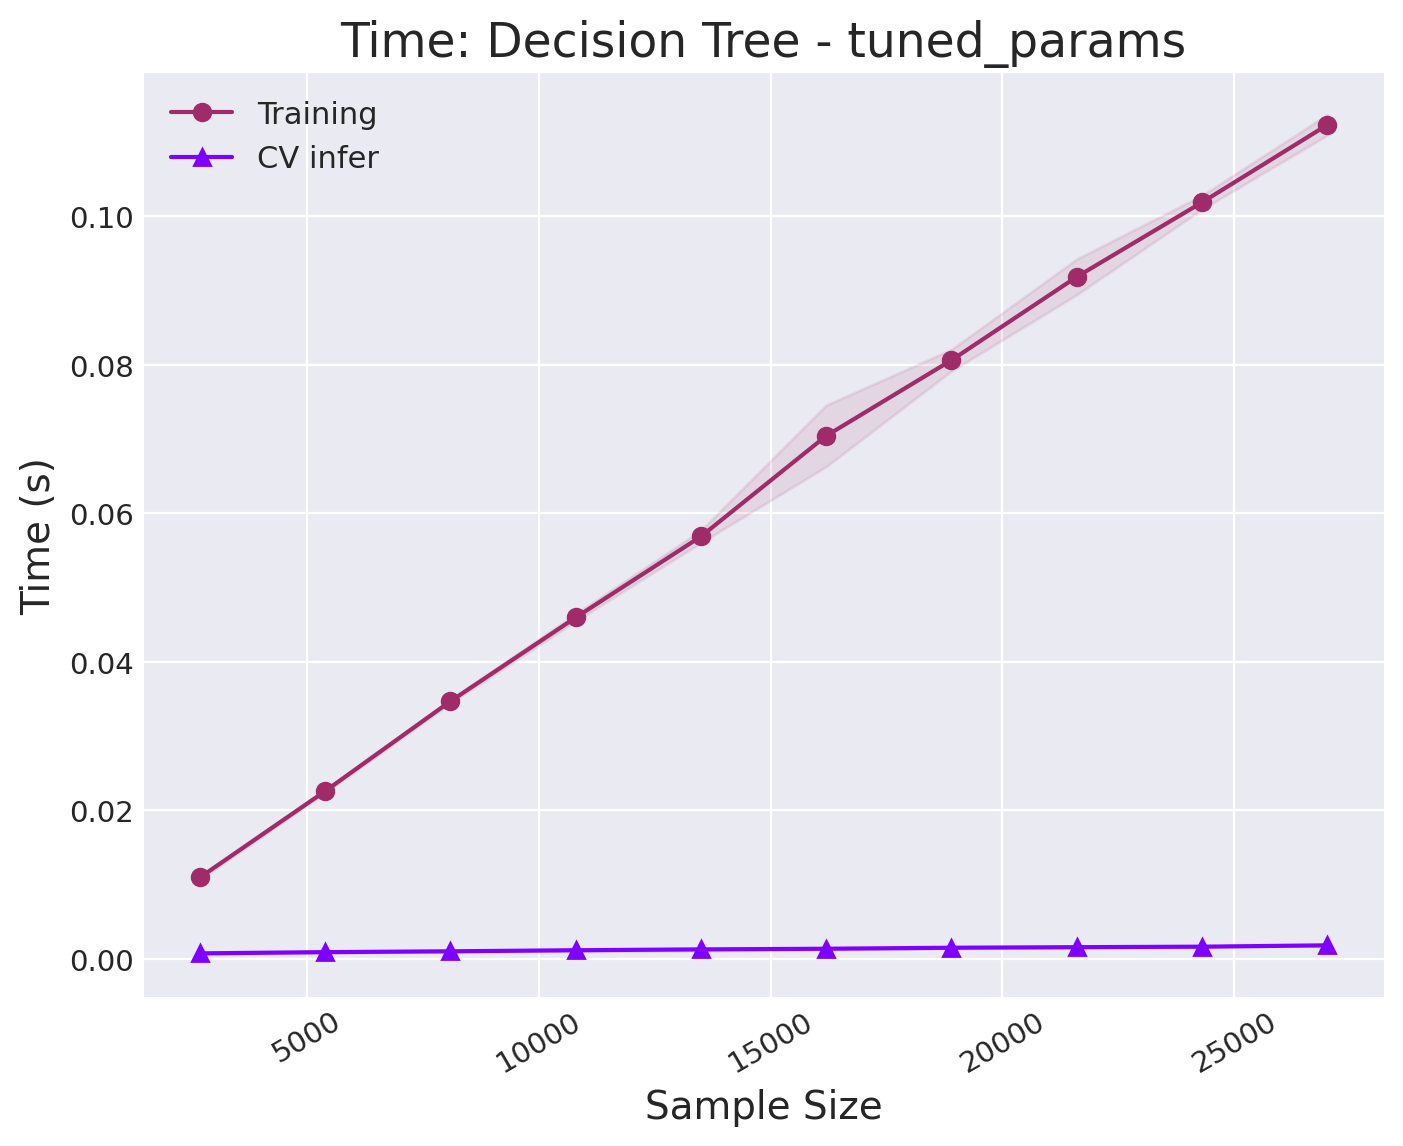

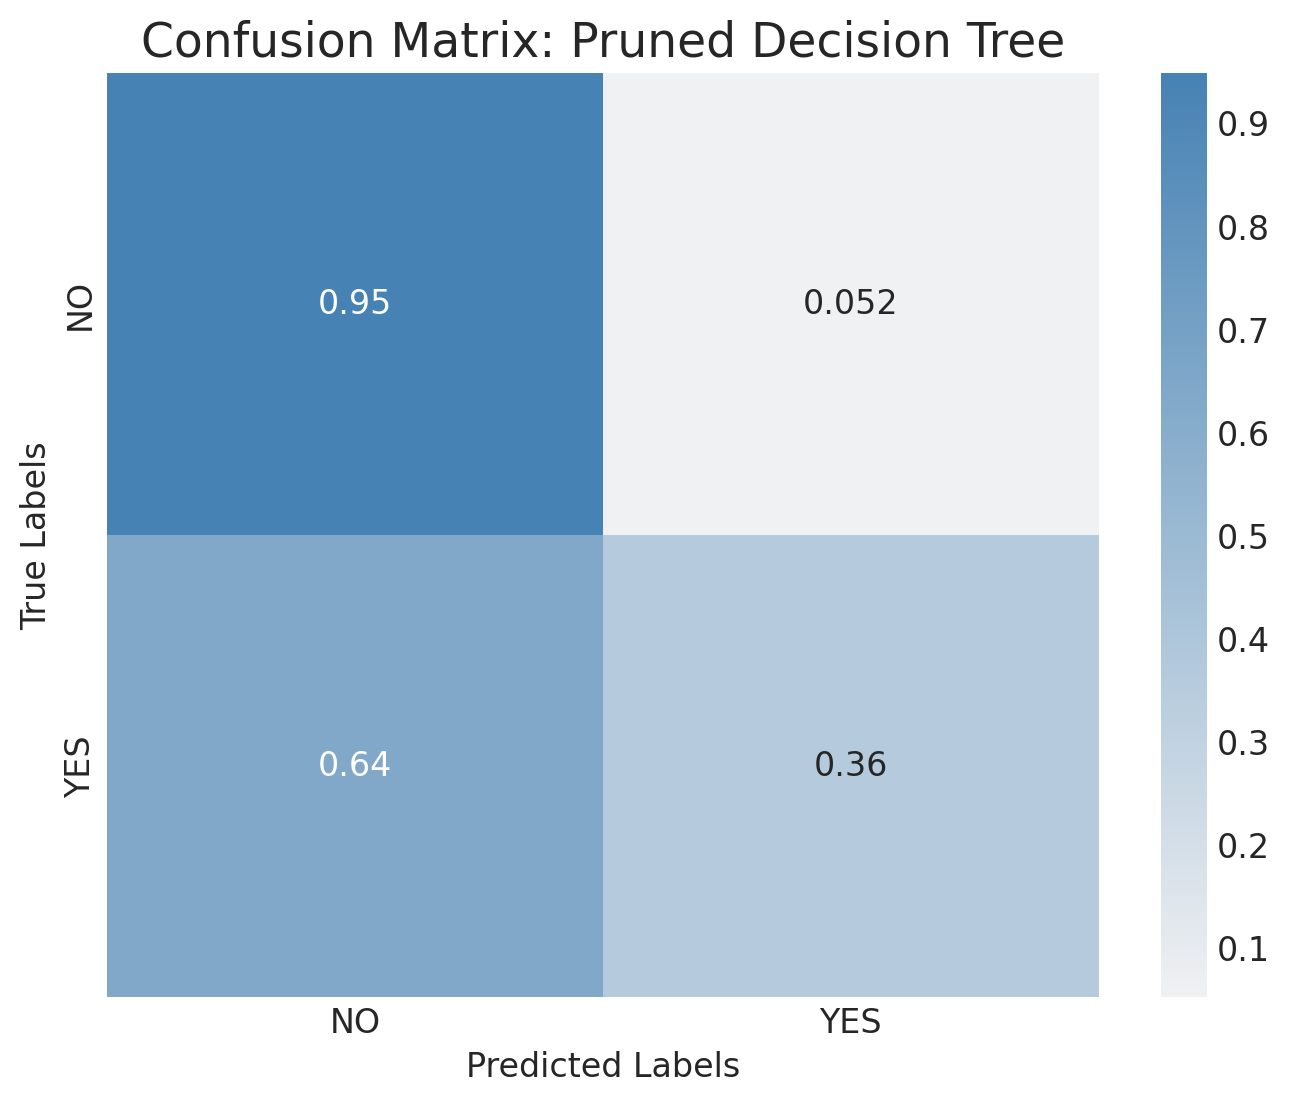

CPU times: user 4.54 s, sys: 771 ms, total: 5.31 s
Wall time: 4.31 s


In [6]:
%%time
# Get learning curve 
clf = DecisionTreeClassifier(
    random_state=888,
    criterion="log_loss",
    max_depth=tuned_dt_clf.best_params_['max_depth'],
    min_samples_leaf=tuned_dt_clf.best_params_['min_samples_leaf']
)

# plot Learning curve for the default DT with (supposedly) optimal max_depth and min_samples_leaf
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="Decision Tree - tuned_params"
)

# fit DT clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(X_train.values, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(X_test.values)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['NO', 'YES'],
    title="Pruned Decision Tree")

In [7]:
MODEL_RES['model_name'].append("Pruned Decision Tree")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_dt_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

<a id='Boosting'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Histogram-based Gradient Boosted DT classifier </h1></span>
<a href='#Index'> Back to Index</a>

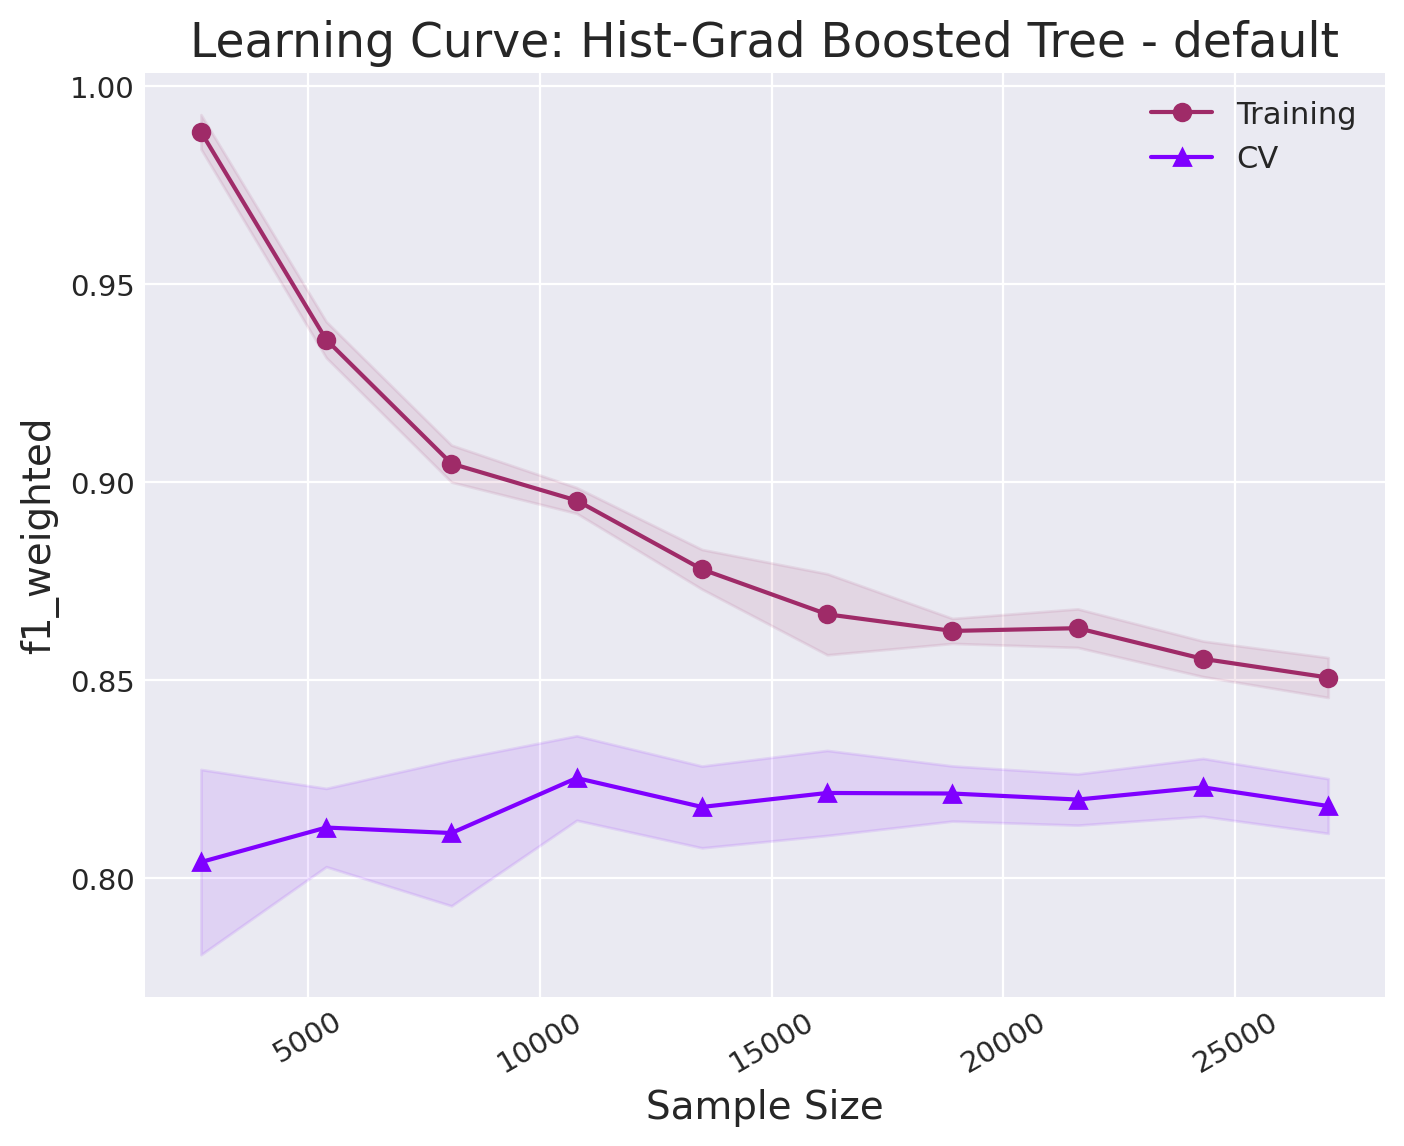

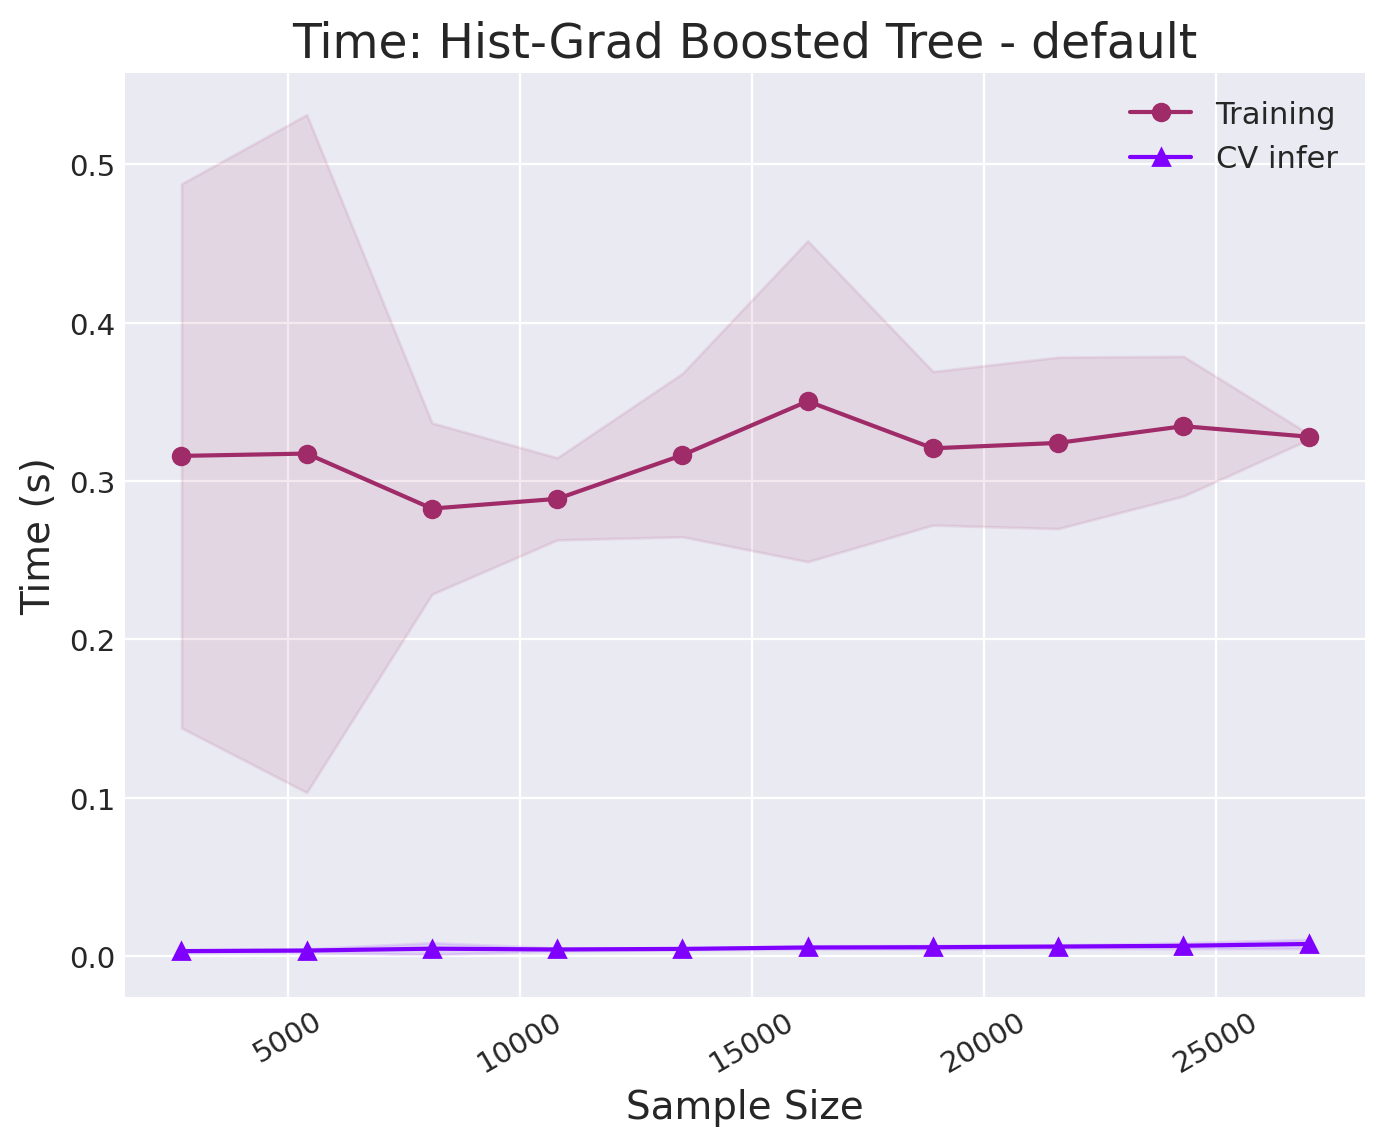

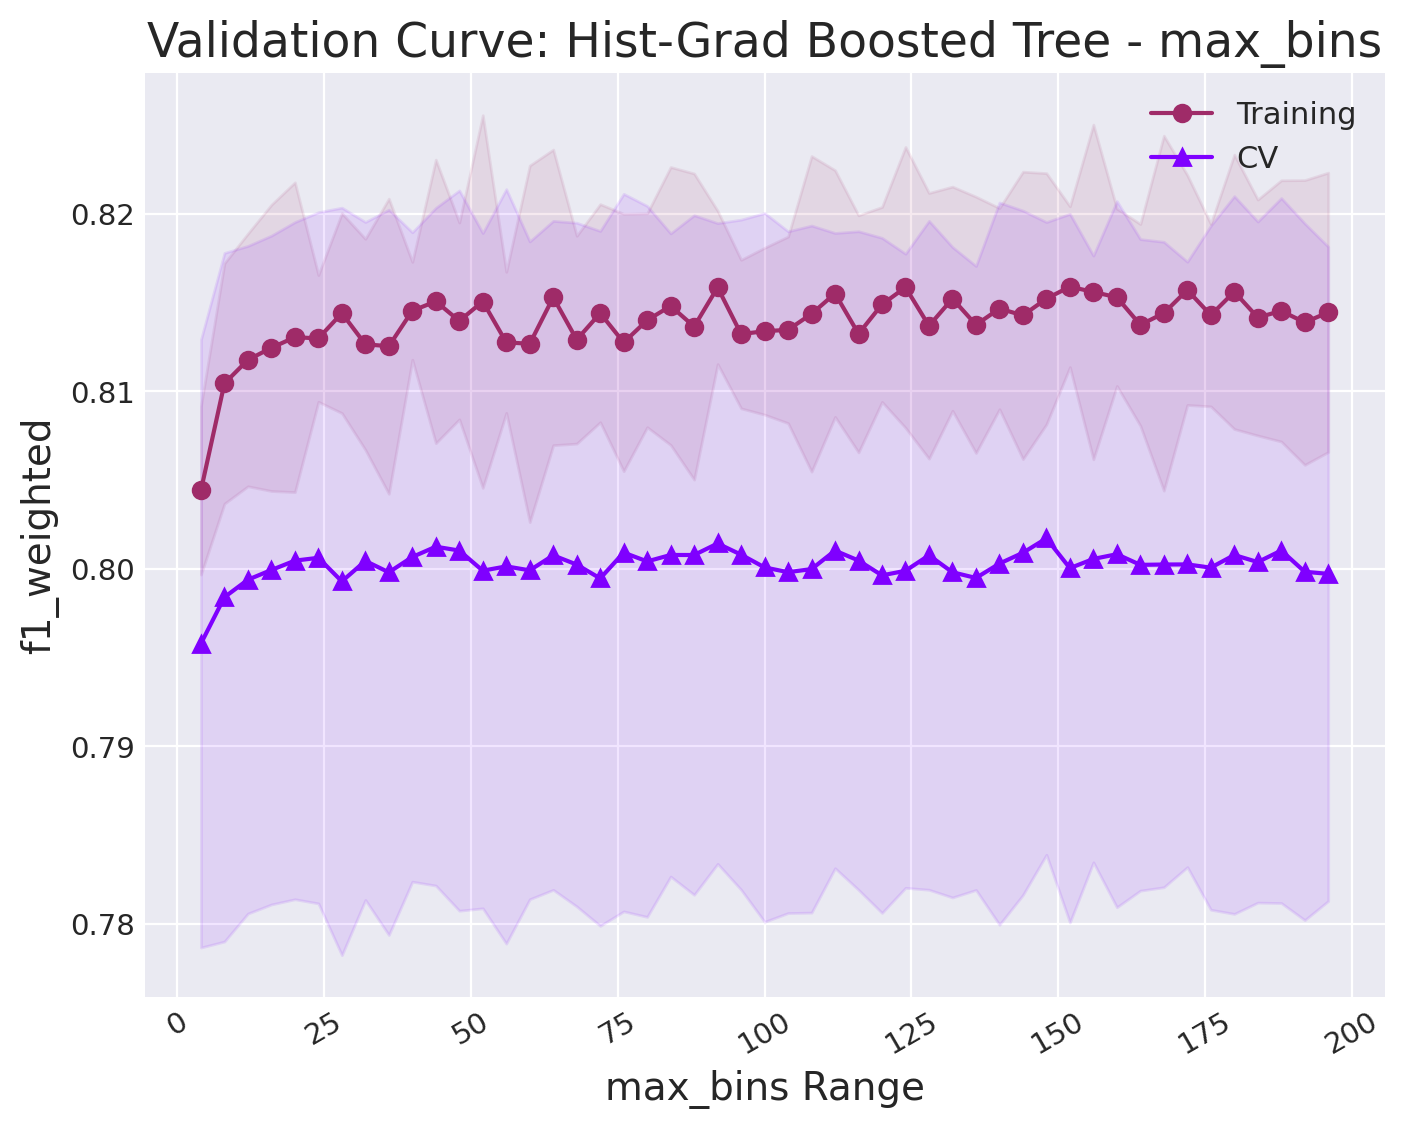

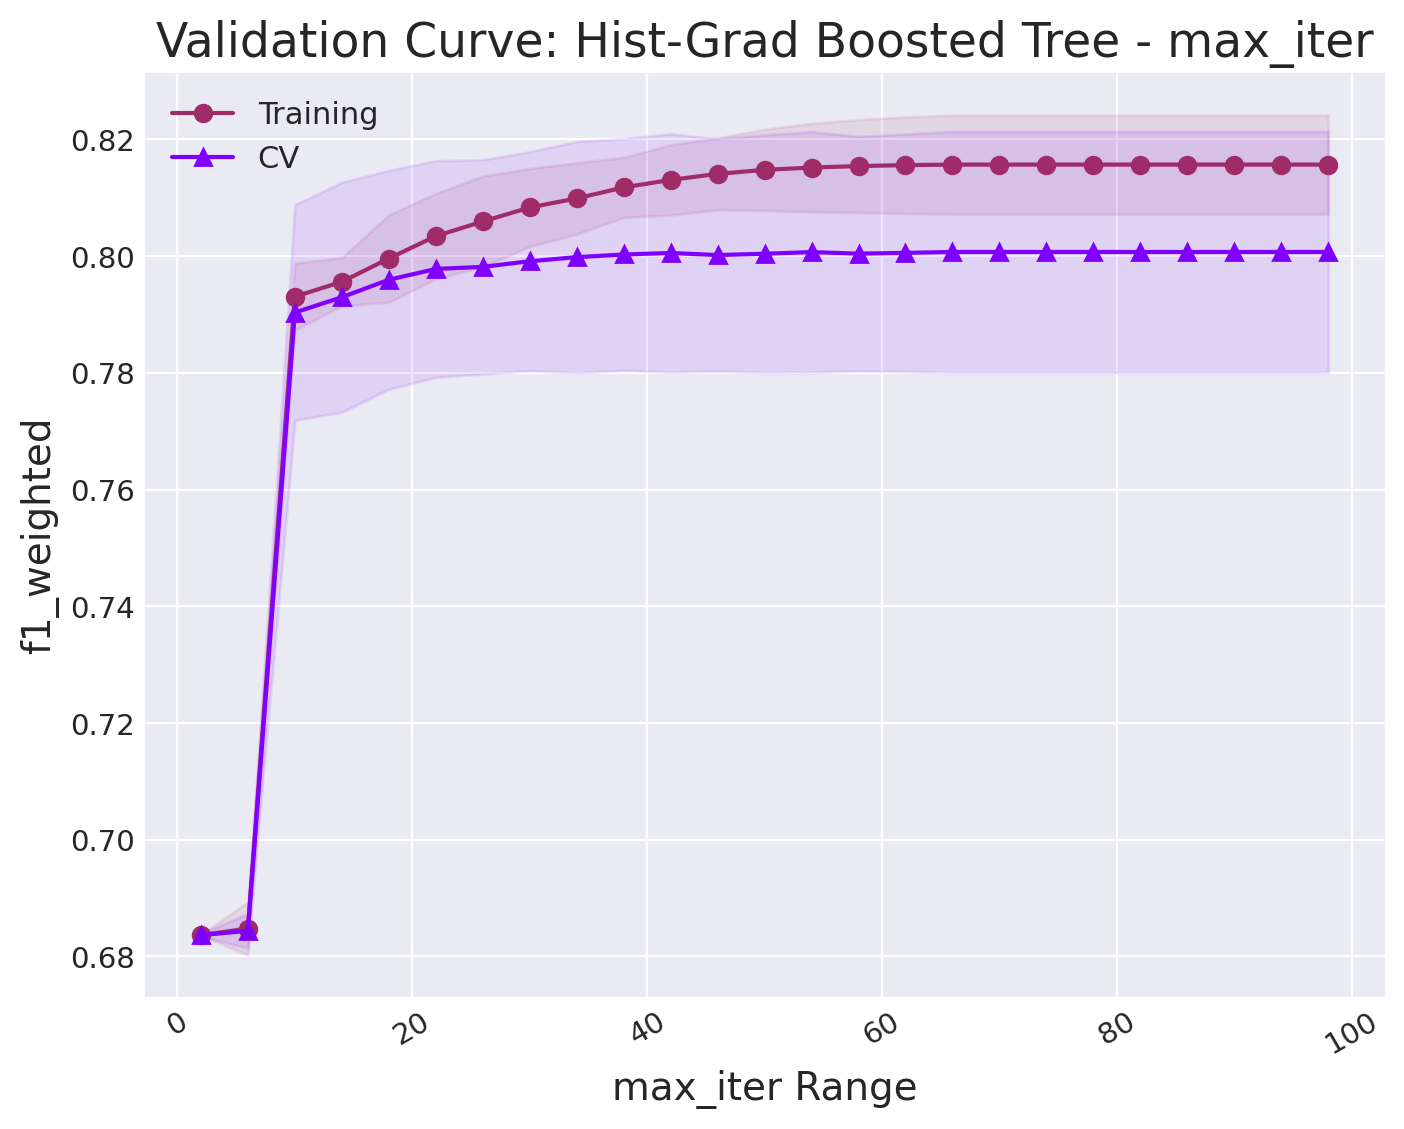

CPU times: user 20min 9s, sys: 3.08 s, total: 20min 12s
Wall time: 1min 30s


In [8]:
%%time
# experiment with max_bins and max_iter
max_bins_range = list(range(0, 200, 4))
max_bins_range[0] = 1
max_iter_range = list(range(2,100,4))
train_sizes = np.linspace(0.1, 1, 10)

clf = HistGradientBoostingClassifier(random_state=888, loss="log_loss")

# plot Learning curve for the default DT 
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="Hist-Grad Boosted Tree - default"
)


# experiment with max_bins
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='max_bins',
    param_range=max_bins_range,
    metric="f1_weighted",
    title="Hist-Grad Boosted Tree - max_bins"
)


# experiment with max_iter
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='max_iter',
    param_range=max_iter_range,
    metric="f1_weighted",
    title="Hist-Grad Boosted Tree - max_iter"
)

In [9]:
%%time
# optimize the decision tree by searching max_bins between 40 and 60, max_iter between 30 and 50
param_grid = {
    'max_bins': range(40,61), 
    'max_iter': range(30, 51)
    }

tuned_boostdt_clf = HalvingGridSearchCV(
   estimator = HistGradientBoostingClassifier(random_state=888, loss="log_loss"),
   param_grid=param_grid,
   cv=5,
   factor=2
   )
tuned_boostdt_clf.fit(X_train, y_train)
print("With HalvingGridSearchCV, best parameters are: \n", tuned_boostdt_clf.best_params_)


With HalvingGridSearchCV, best parameters are: 
 {'max_bins': 52, 'max_iter': 30}
CPU times: user 1h 47min 31s, sys: 8.93 s, total: 1h 47min 39s
Wall time: 6min 45s


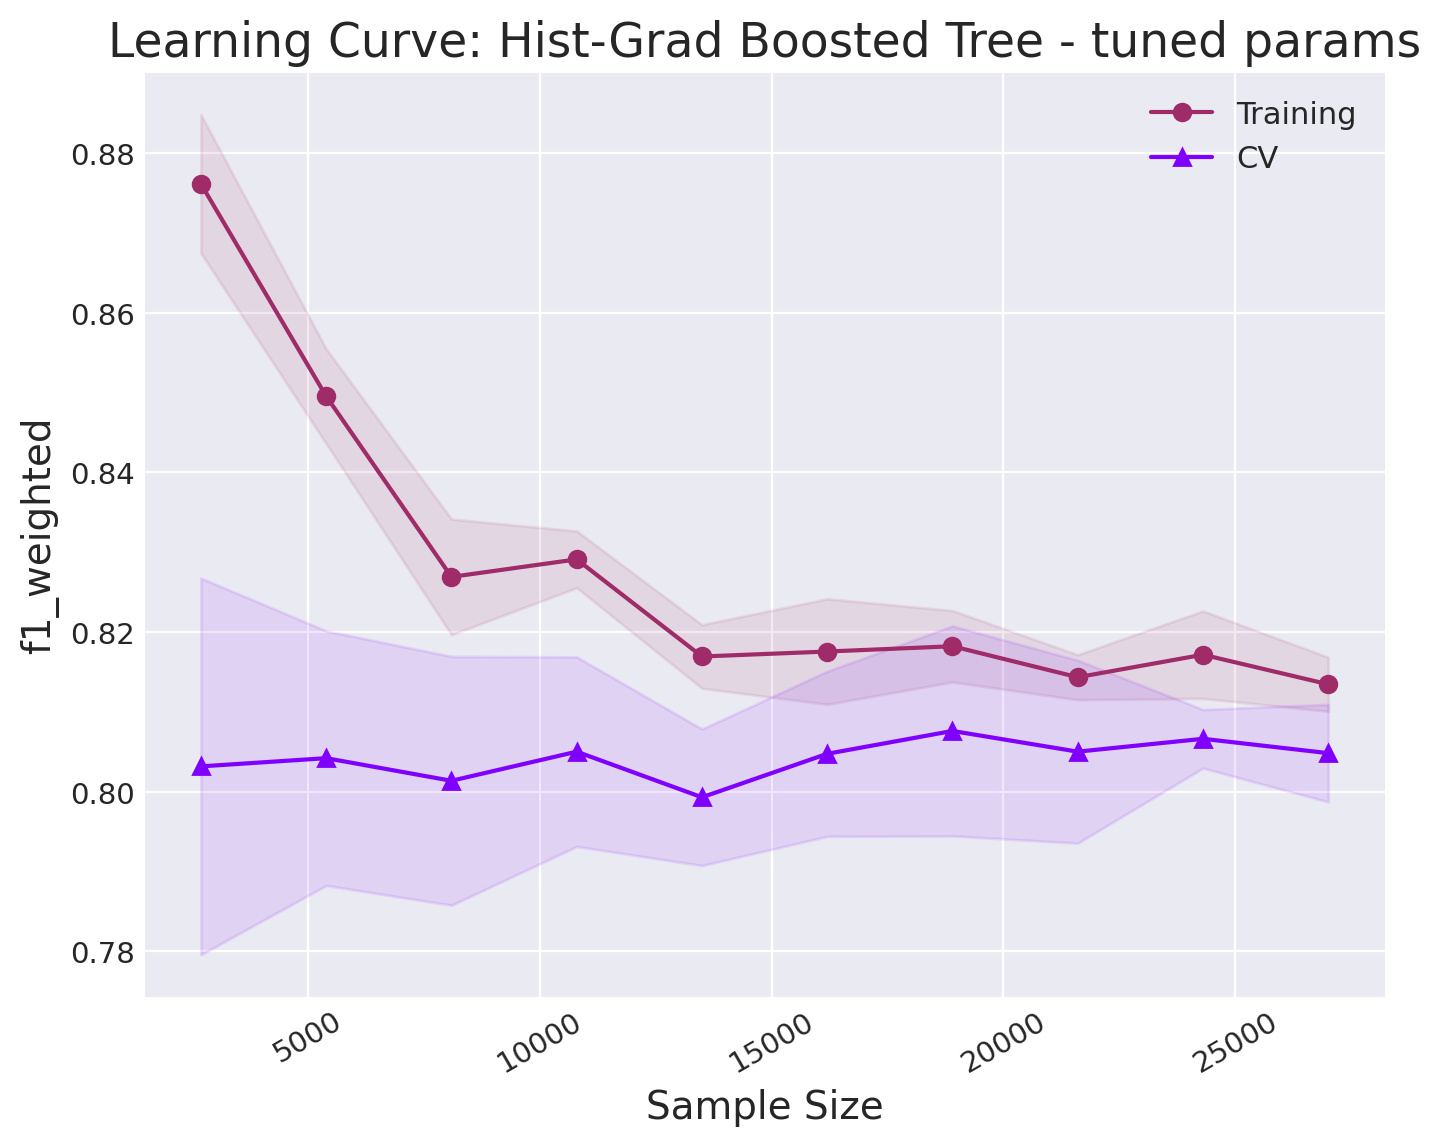

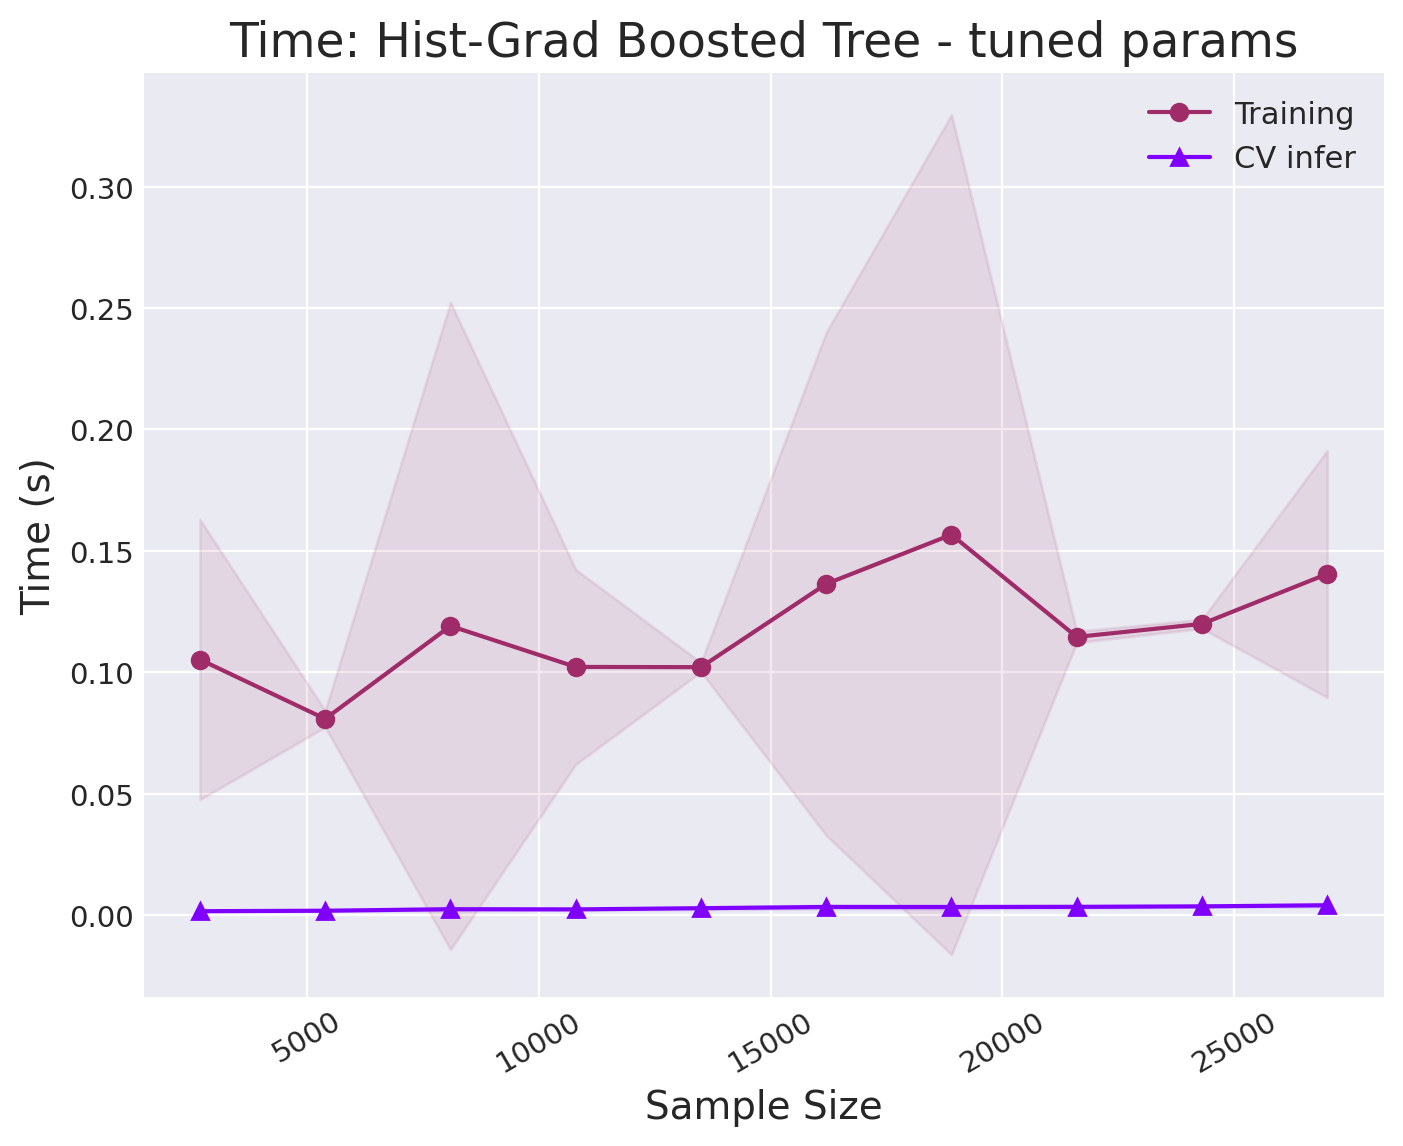

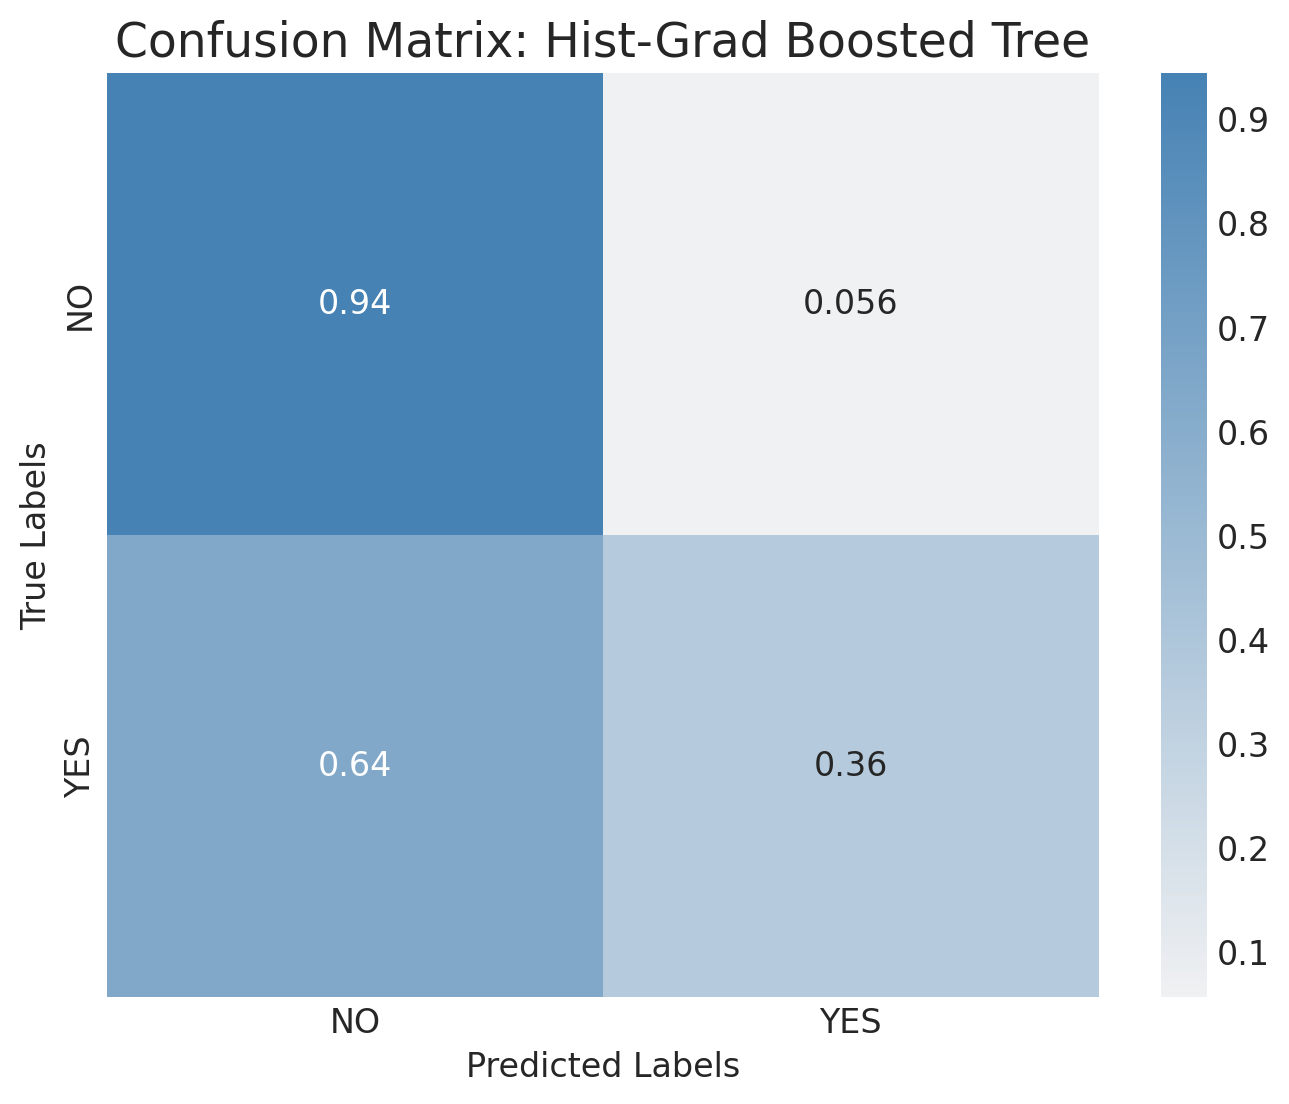

In [10]:
### Train clf on the whole training data and get learning curve

clf = HistGradientBoostingClassifier(
    random_state=888,
    loss="log_loss",
    max_bins=tuned_boostdt_clf.best_params_['max_bins'],
    max_iter=tuned_boostdt_clf.best_params_['max_iter']
)

# plot Learning curve for the boosted DT  with the (supposedly) optimal params
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="Hist-Grad Boosted Tree - tuned params"
)

# fit DT clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(X_train.values, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(X_test.values)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['NO', 'YES'],
    title="Hist-Grad Boosted Tree")

In [11]:
MODEL_RES['model_name'].append("Hist-Grad Boosted Tree")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_boostdt_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

<a id='MLP'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Multi-layer Perceptron </h1></span>
<a href='#Index'> Back to Index</a>

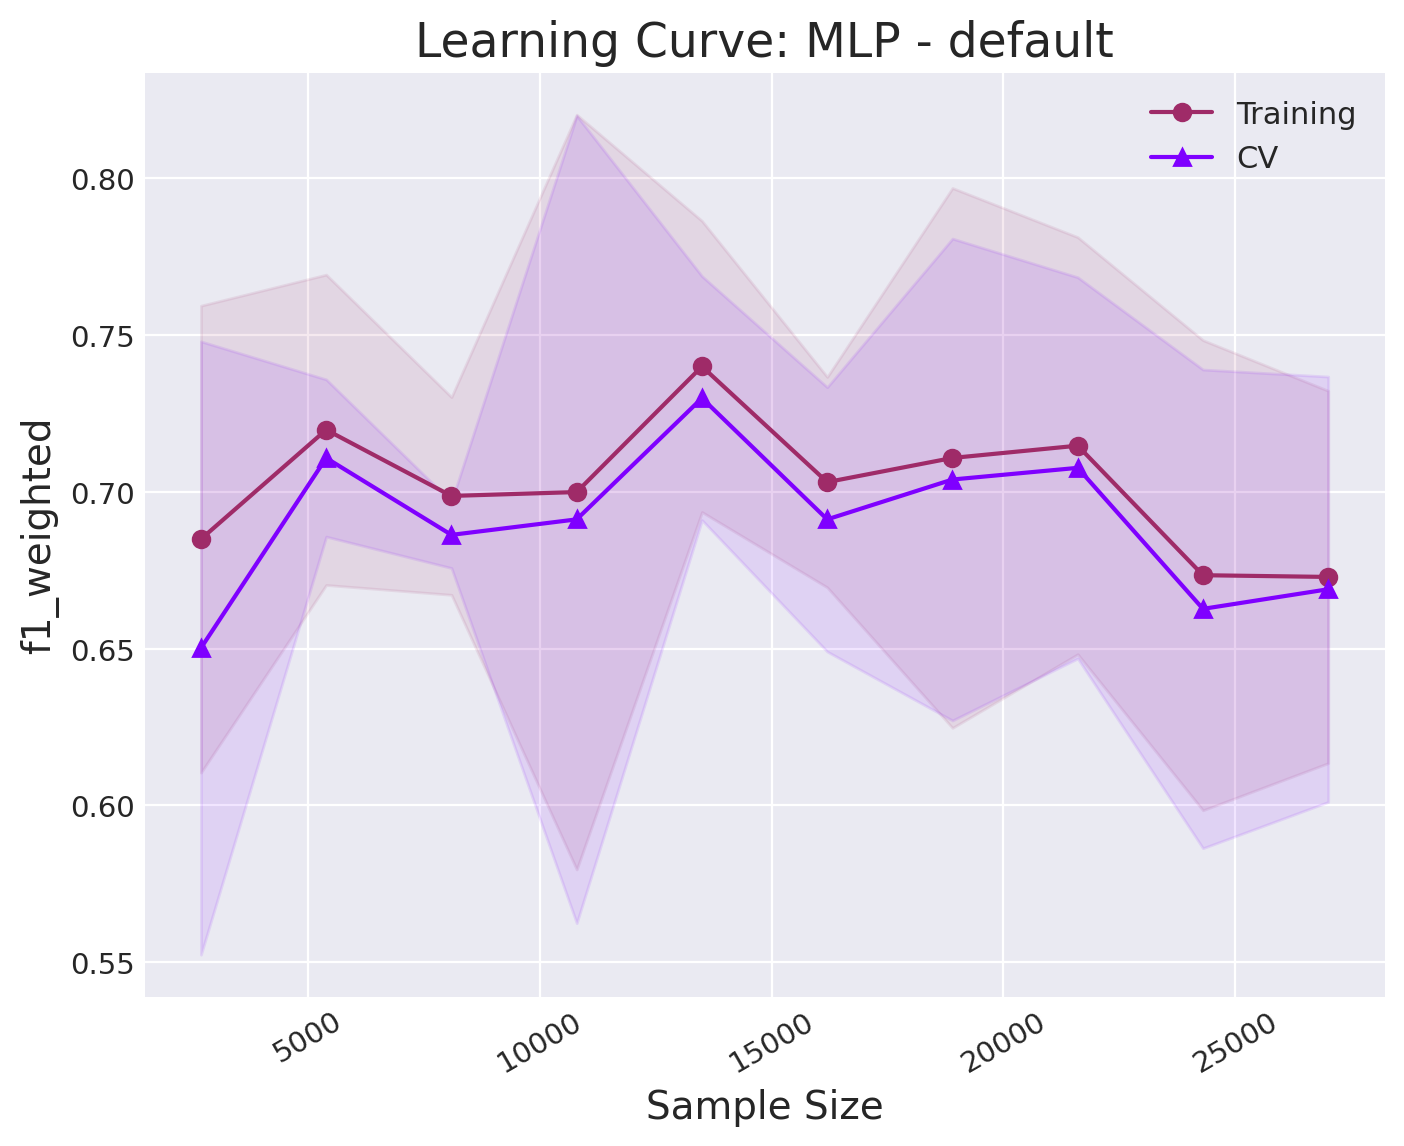

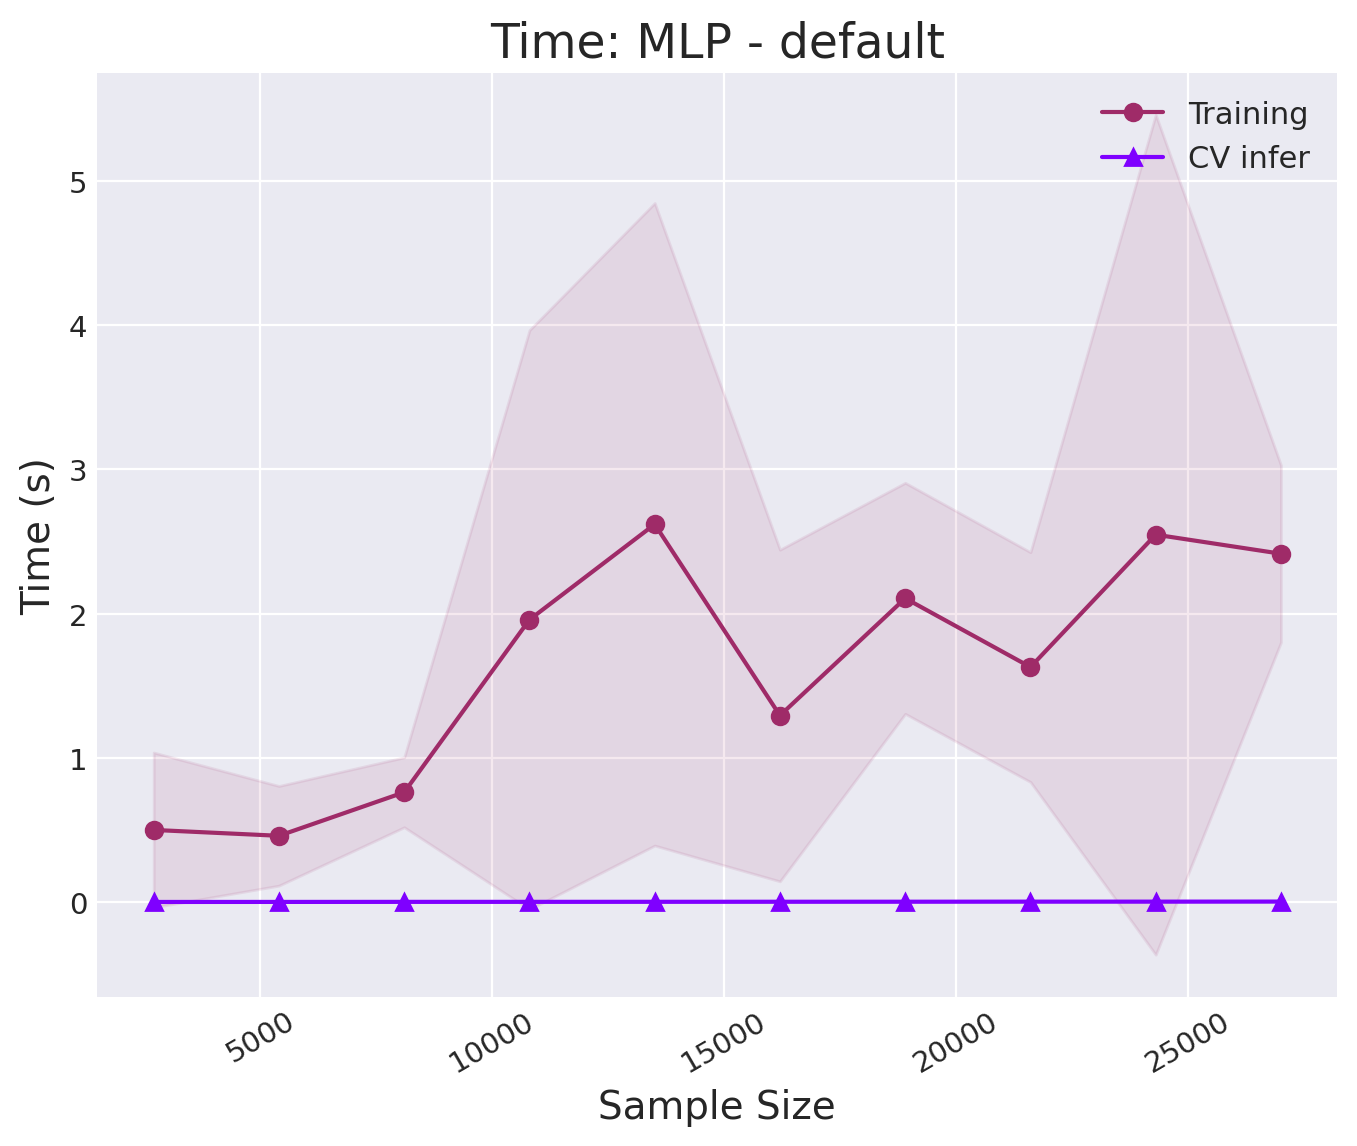

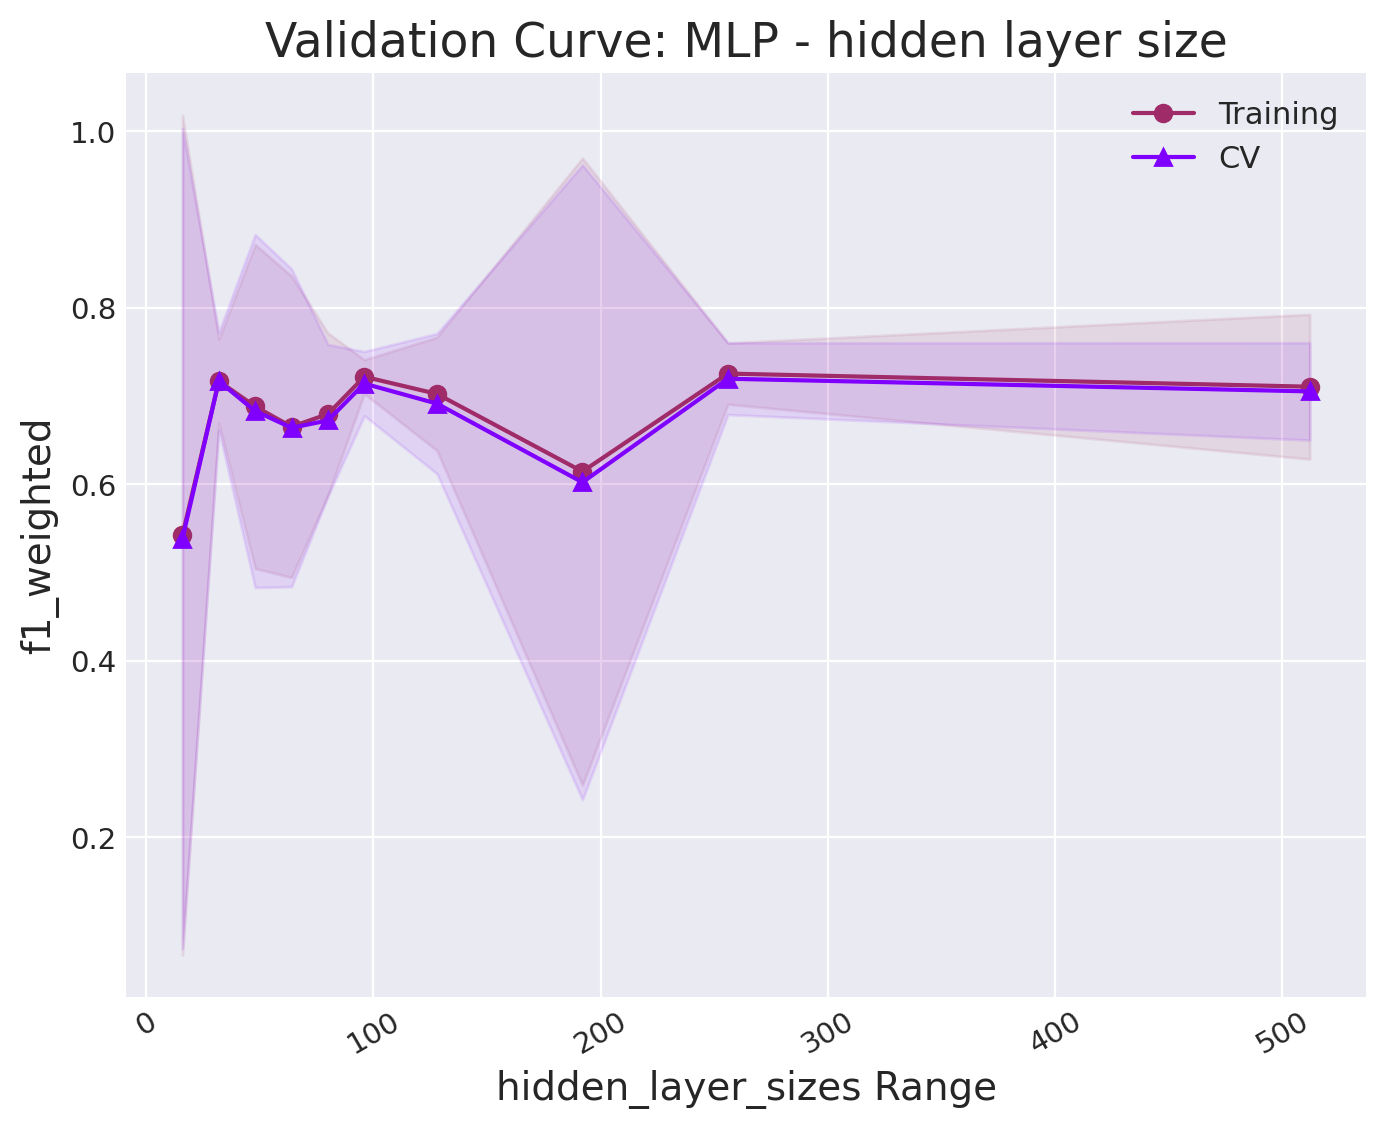

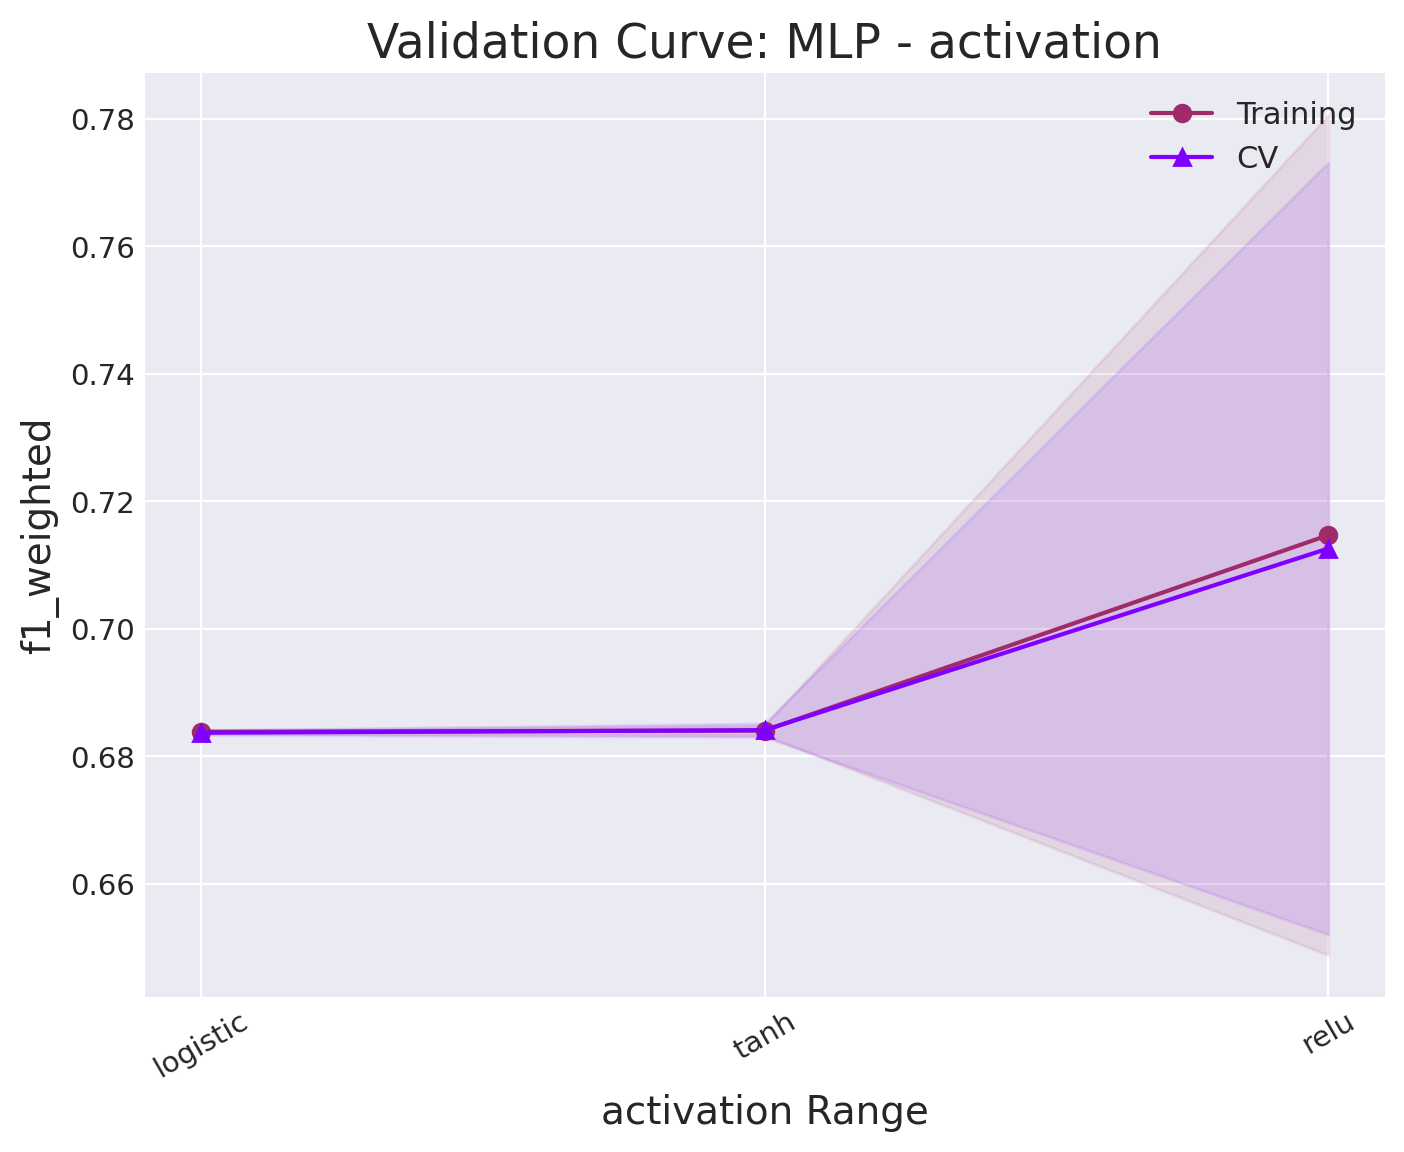

CPU times: user 22min 50s, sys: 46min 49s, total: 1h 9min 40s
Wall time: 4min 33s


In [12]:
%%time
# experiment with number of hidden nodes and activation function
# hidden_layer_sizes_range= [(16,), (32,), (48,), (64,), (80,), (96,), (128,), (192,), (256,), (512,)]
hidden_layer_sizes_range = [16,32,48,64,80,96,128,192,256,512]
act_func_range = ['logistic', 'tanh', 'relu']
train_sizes = np.linspace(0.1, 1, 10)

clf = MLPClassifier(random_state=888)

# plot Learning curve for the default DT 
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="MLP - default"
)

# experiment with hidden layer size
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='hidden_layer_sizes',
    param_range=hidden_layer_sizes_range,
    metric="f1_weighted",
    title="MLP - hidden layer size"
)

# experiment with act function
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='activation',
    param_range=act_func_range ,
    metric="f1_weighted",
    title="MLP - activation"
)

In [13]:
%%time
# optimize the MLP by searching for best number of hidden units and activation function
param_grid = {
    'hidden_layer_sizes': [(48,), (64,), (80,), (96,), (128,), (192,)],
    'activation': ['logistic', 'tanh', 'relu']
    }

tuned_MLP_clf = HalvingGridSearchCV(
   estimator = MLPClassifier(random_state=888),
   param_grid=param_grid,
   cv=5,
   factor=2
   )
tuned_MLP_clf.fit(X_train, y_train)
print("With HalvingGridSearchCV, best parameters are: \n", tuned_MLP_clf.best_params_)

With HalvingGridSearchCV, best parameters are: 
 {'activation': 'logistic', 'hidden_layer_sizes': (96,)}
CPU times: user 11min 29s, sys: 25min, total: 36min 30s
Wall time: 2min 17s


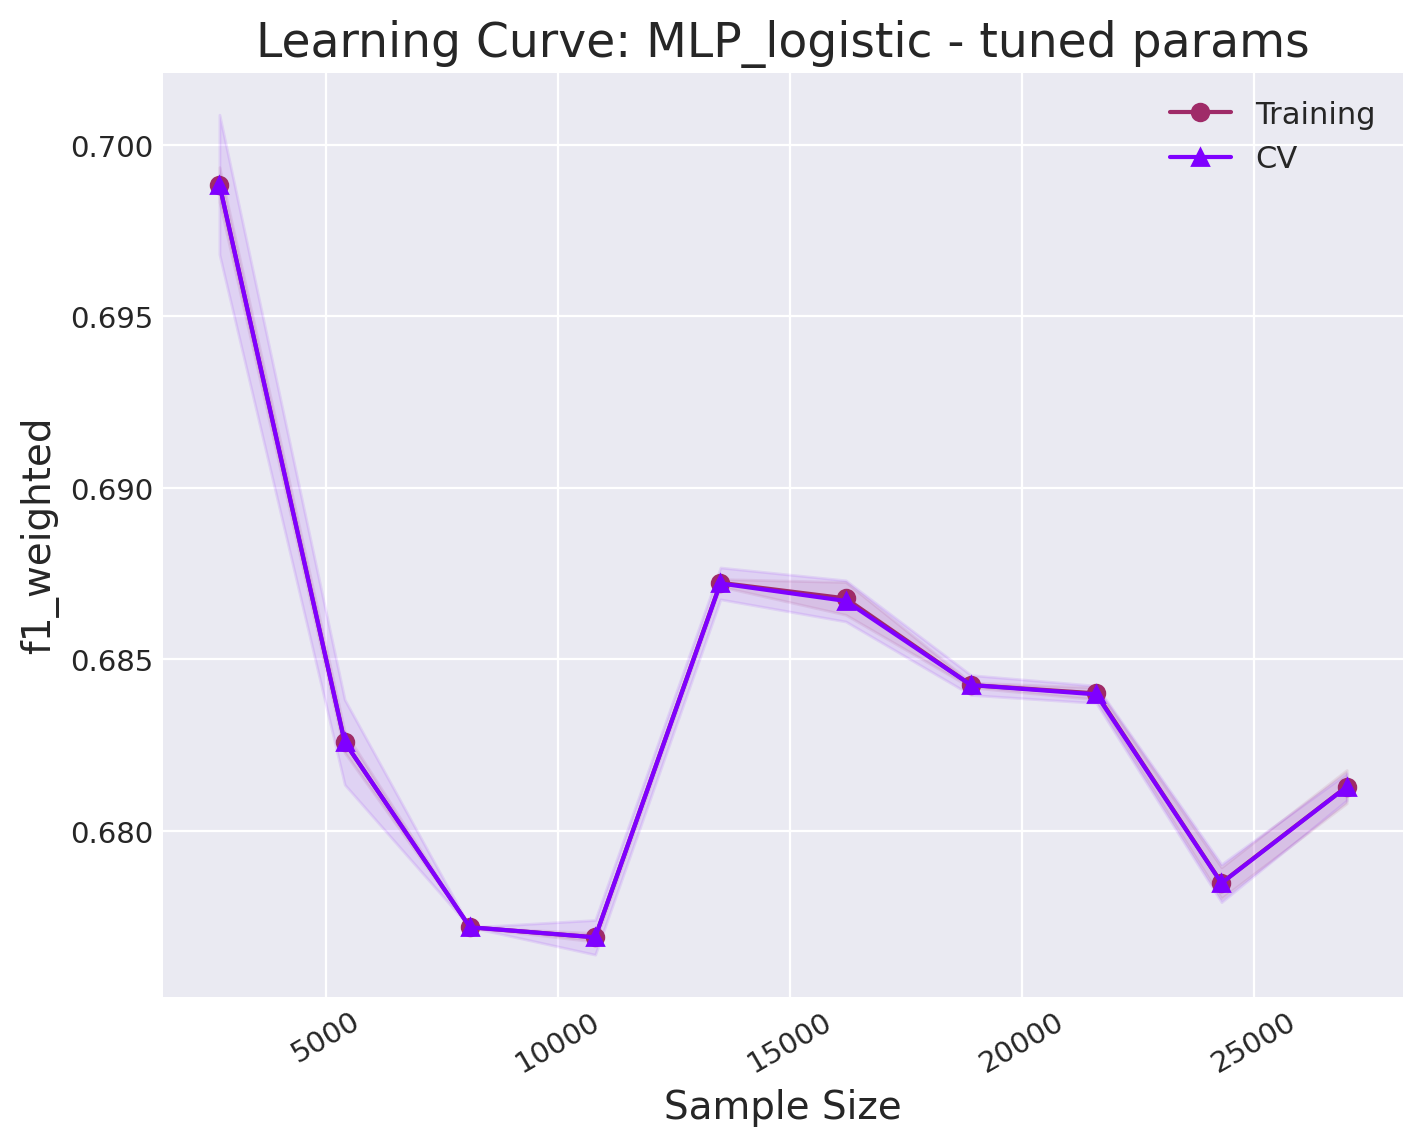

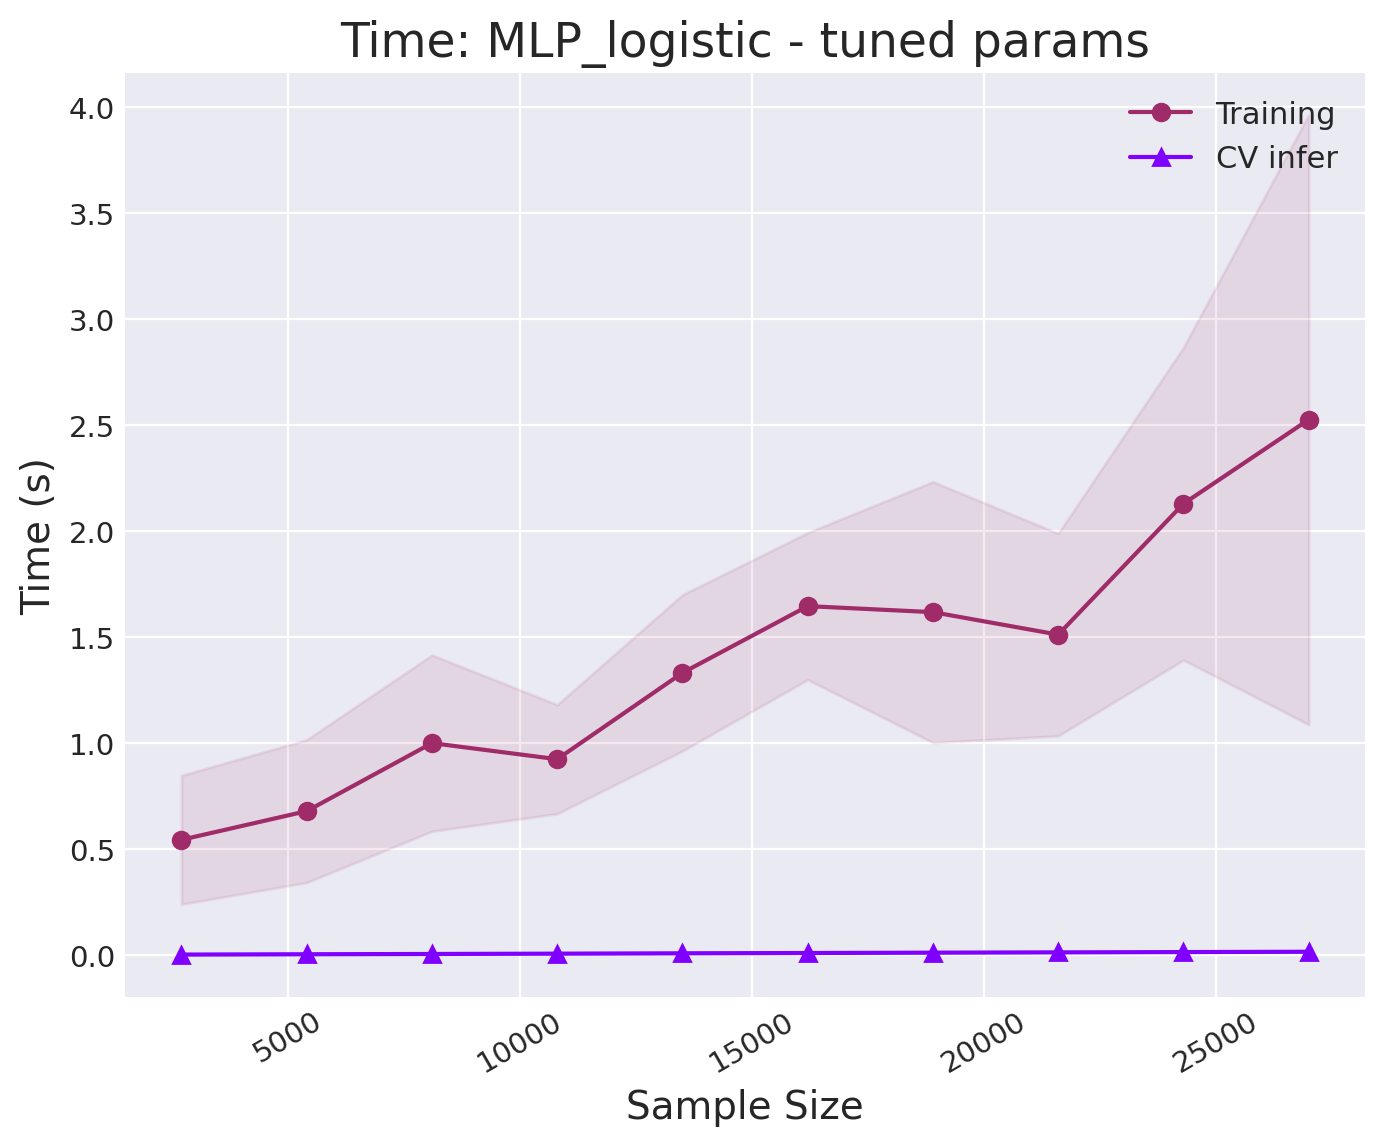

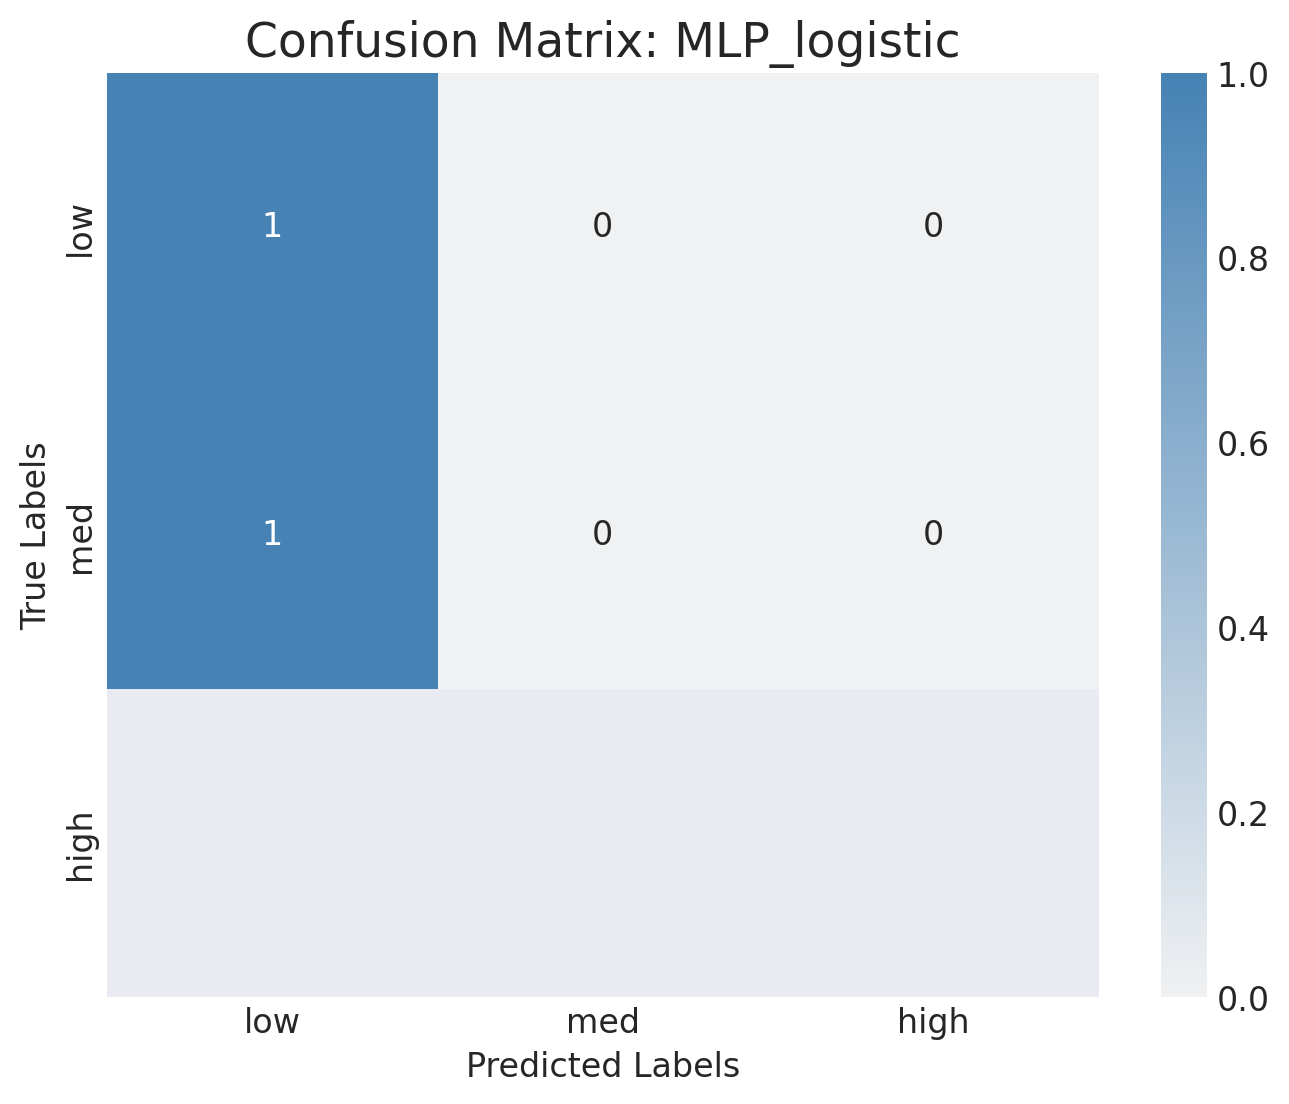

In [14]:
### Train clf on the whole training data and get learning curve
clf = MLPClassifier(
    random_state=888,
    hidden_layer_sizes=tuned_MLP_clf.best_params_['hidden_layer_sizes'],
    activation=tuned_MLP_clf.best_params_['activation']
)

# plot Learning curve for the MLP with the (supposedly) optimal params
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="MLP_logistic - tuned params"
)

# fit DT clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(X_train.values, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(X_test.values)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1, 2]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['low', 'med', 'high'],
    title="MLP_logistic")

In [15]:
MODEL_RES['model_name'].append("MLP_logistic")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_MLP_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

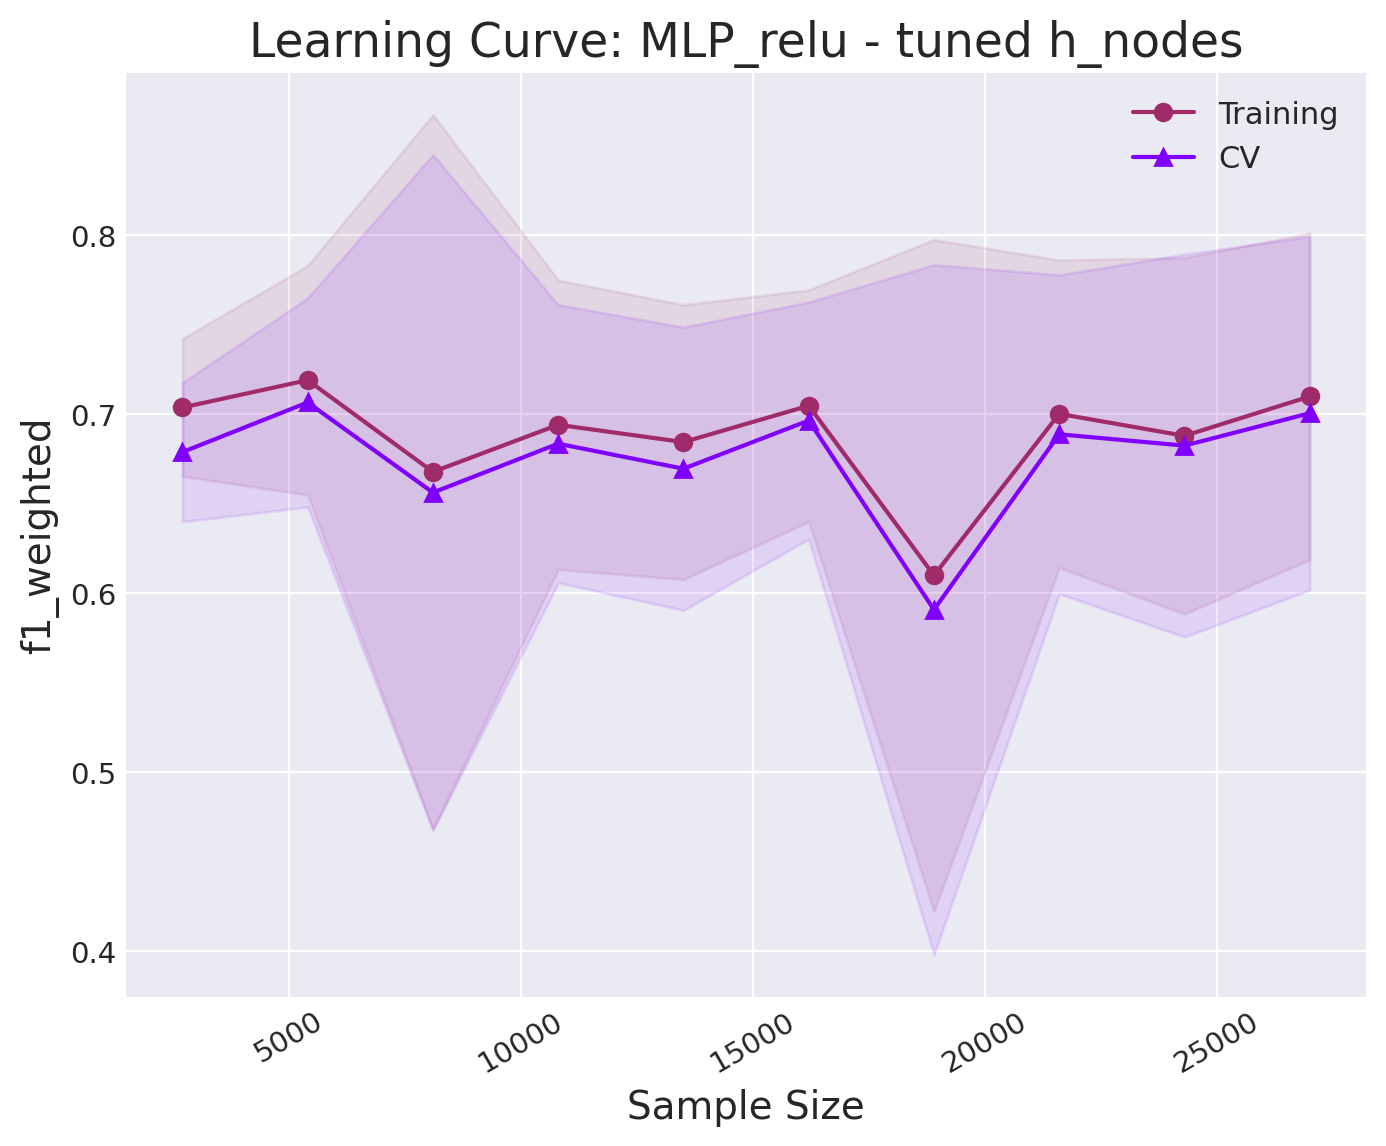

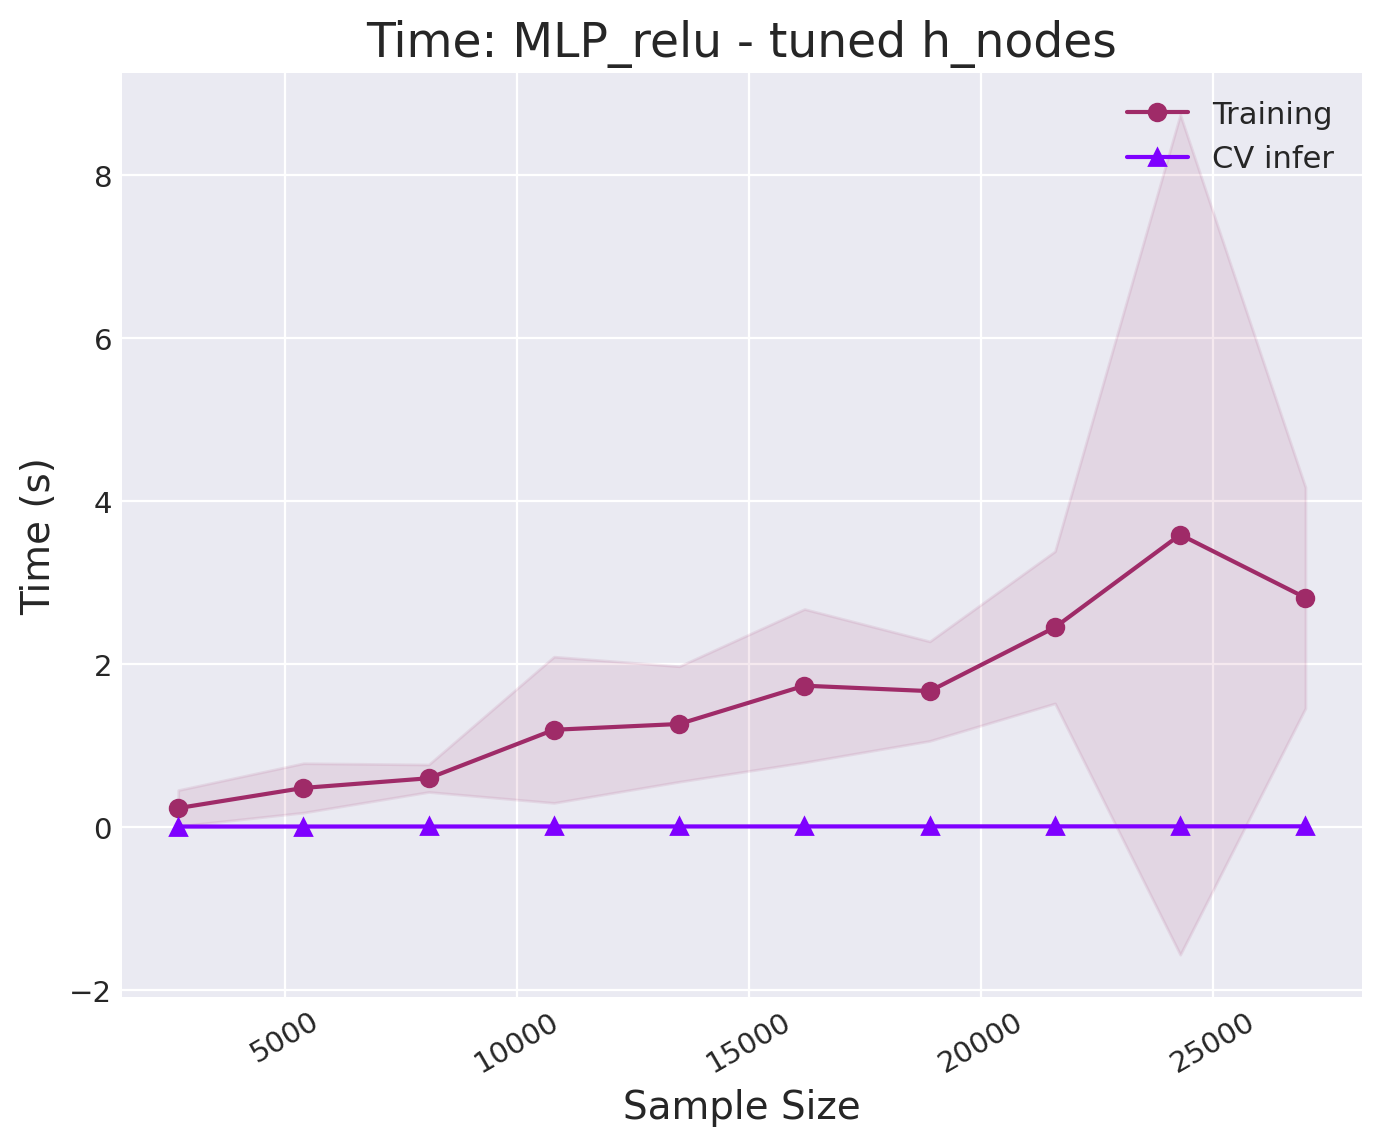

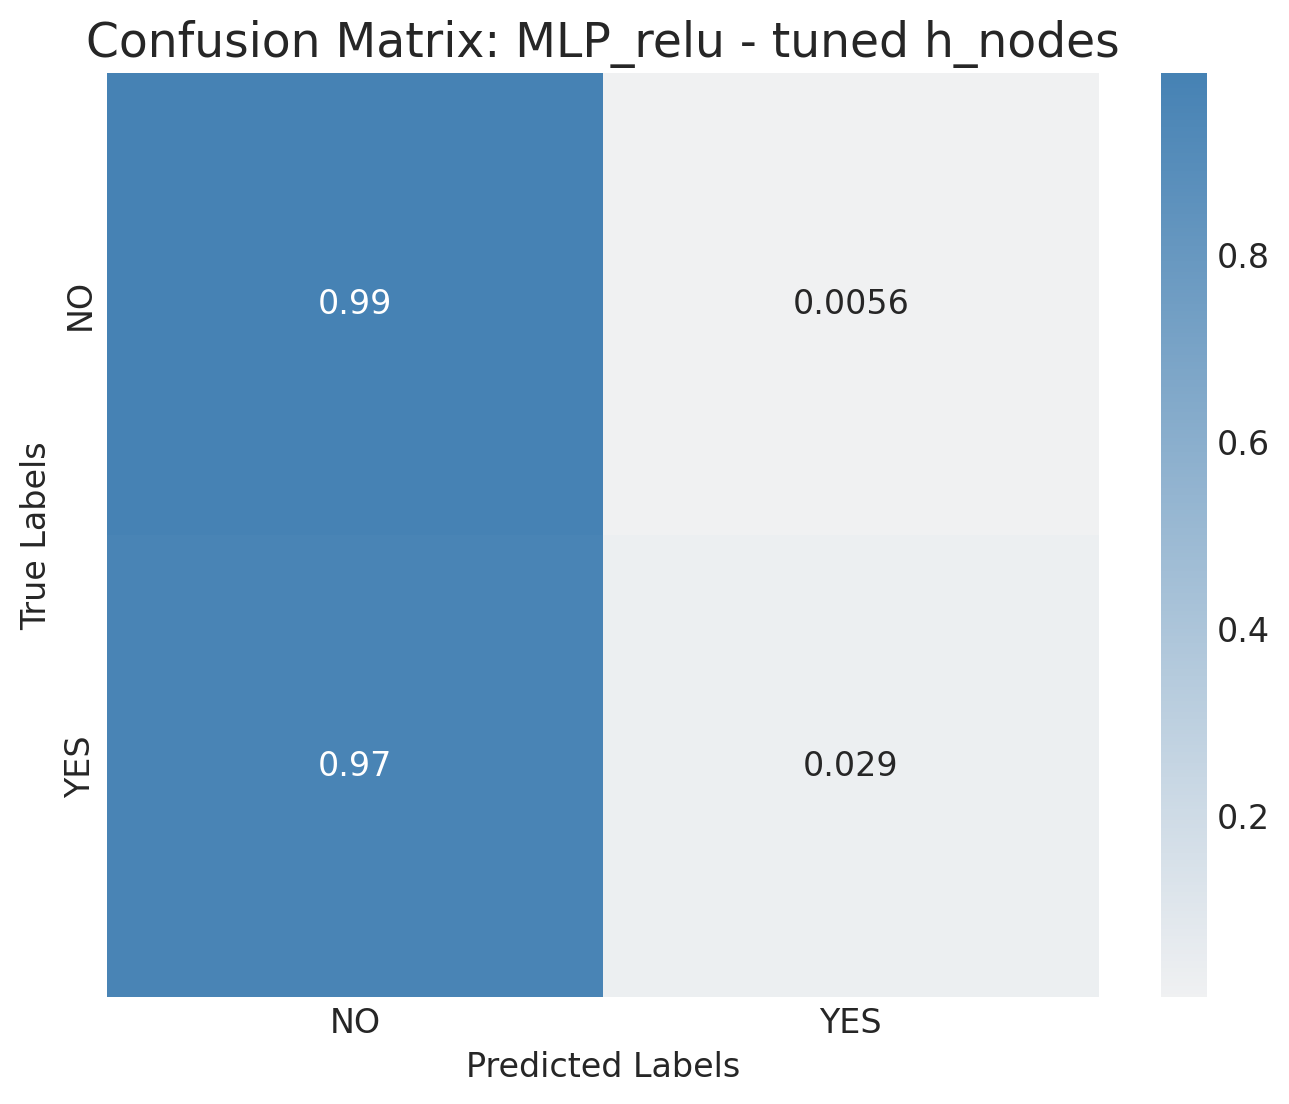

In [16]:
### Train clf on the whole training data and get learning curve
clf = MLPClassifier(
    random_state=888,
    hidden_layer_sizes=tuned_MLP_clf.best_params_['hidden_layer_sizes'],
    activation='relu'
)

# plot Learning curve for the MLP with the (supposedly) optimal params
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="MLP_relu - tuned h_nodes"
)

# fit DT clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(X_train.values, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(X_test.values)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['NO', 'YES'],
    title="MLP_relu - tuned h_nodes")

In [17]:
MODEL_RES['model_name'].append("MLP_relu")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_MLP_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

<a id='kNN'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> kNN </h1></span>
<a href='#Index'> Back to Index</a>

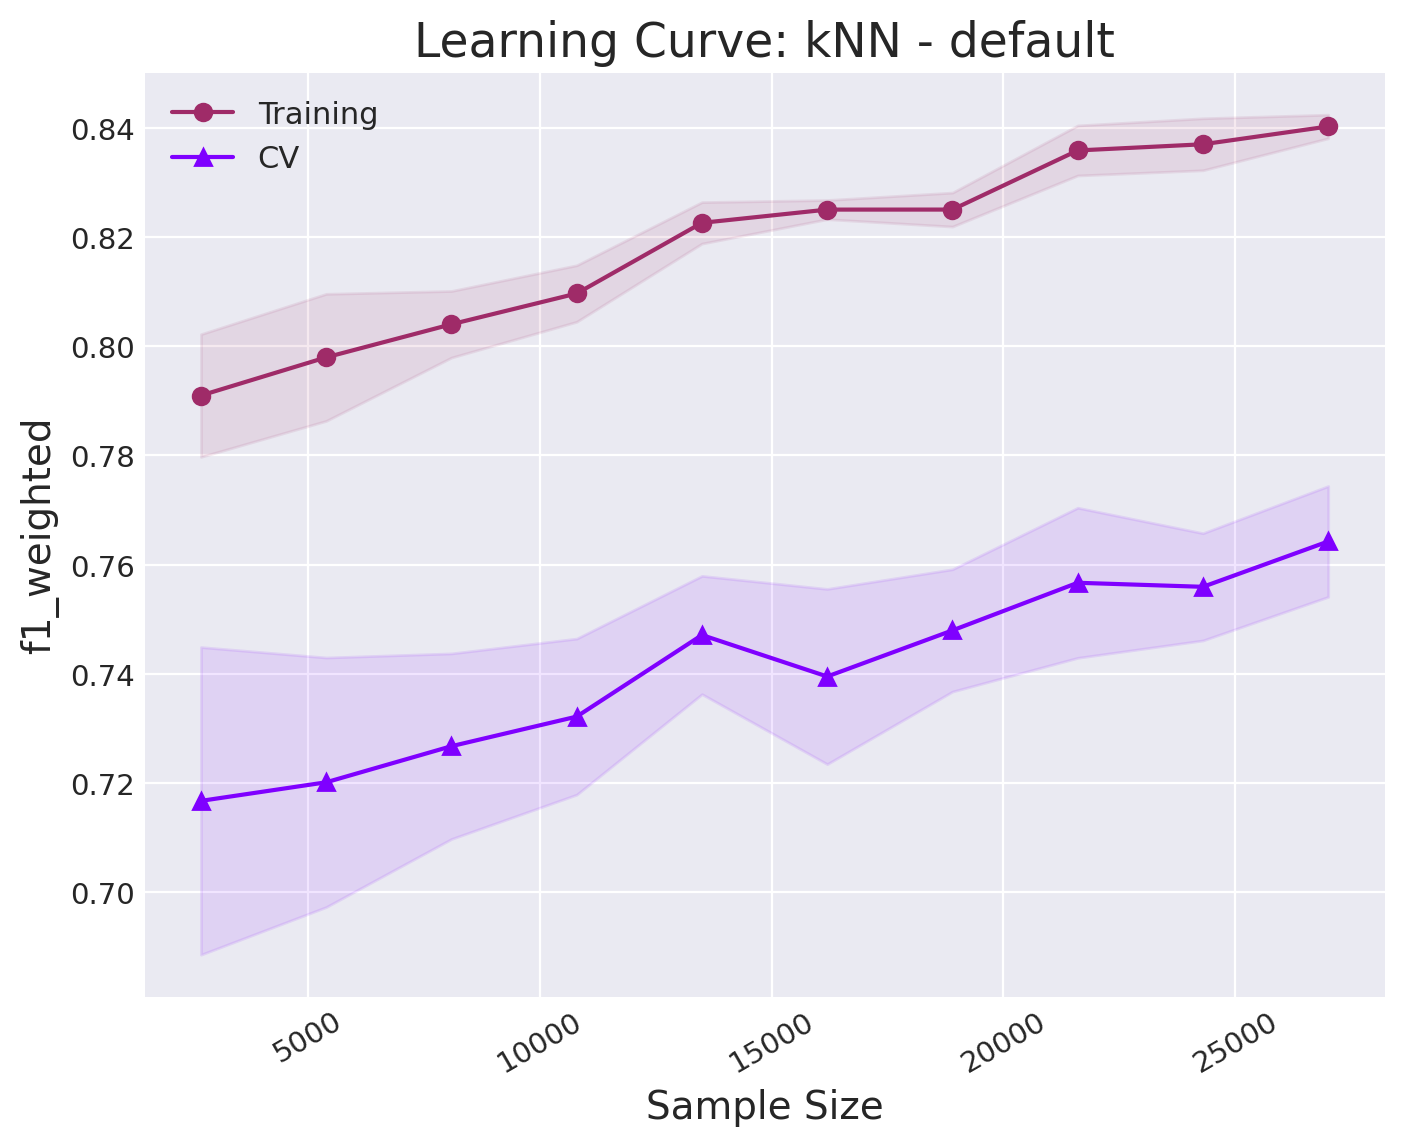

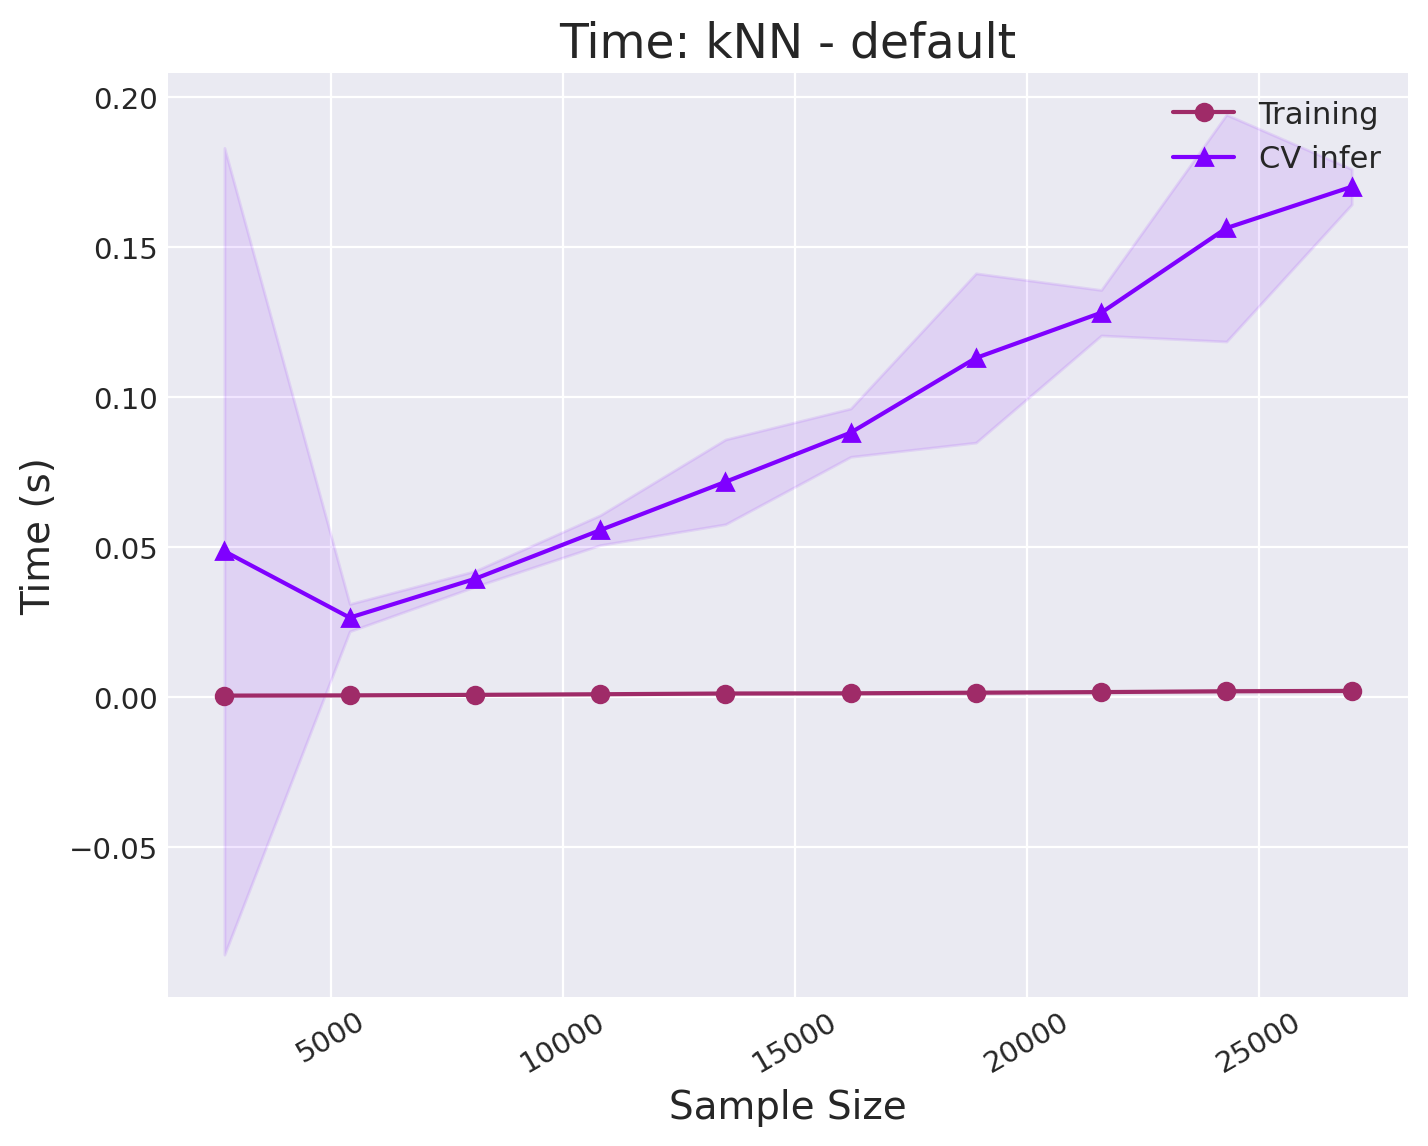

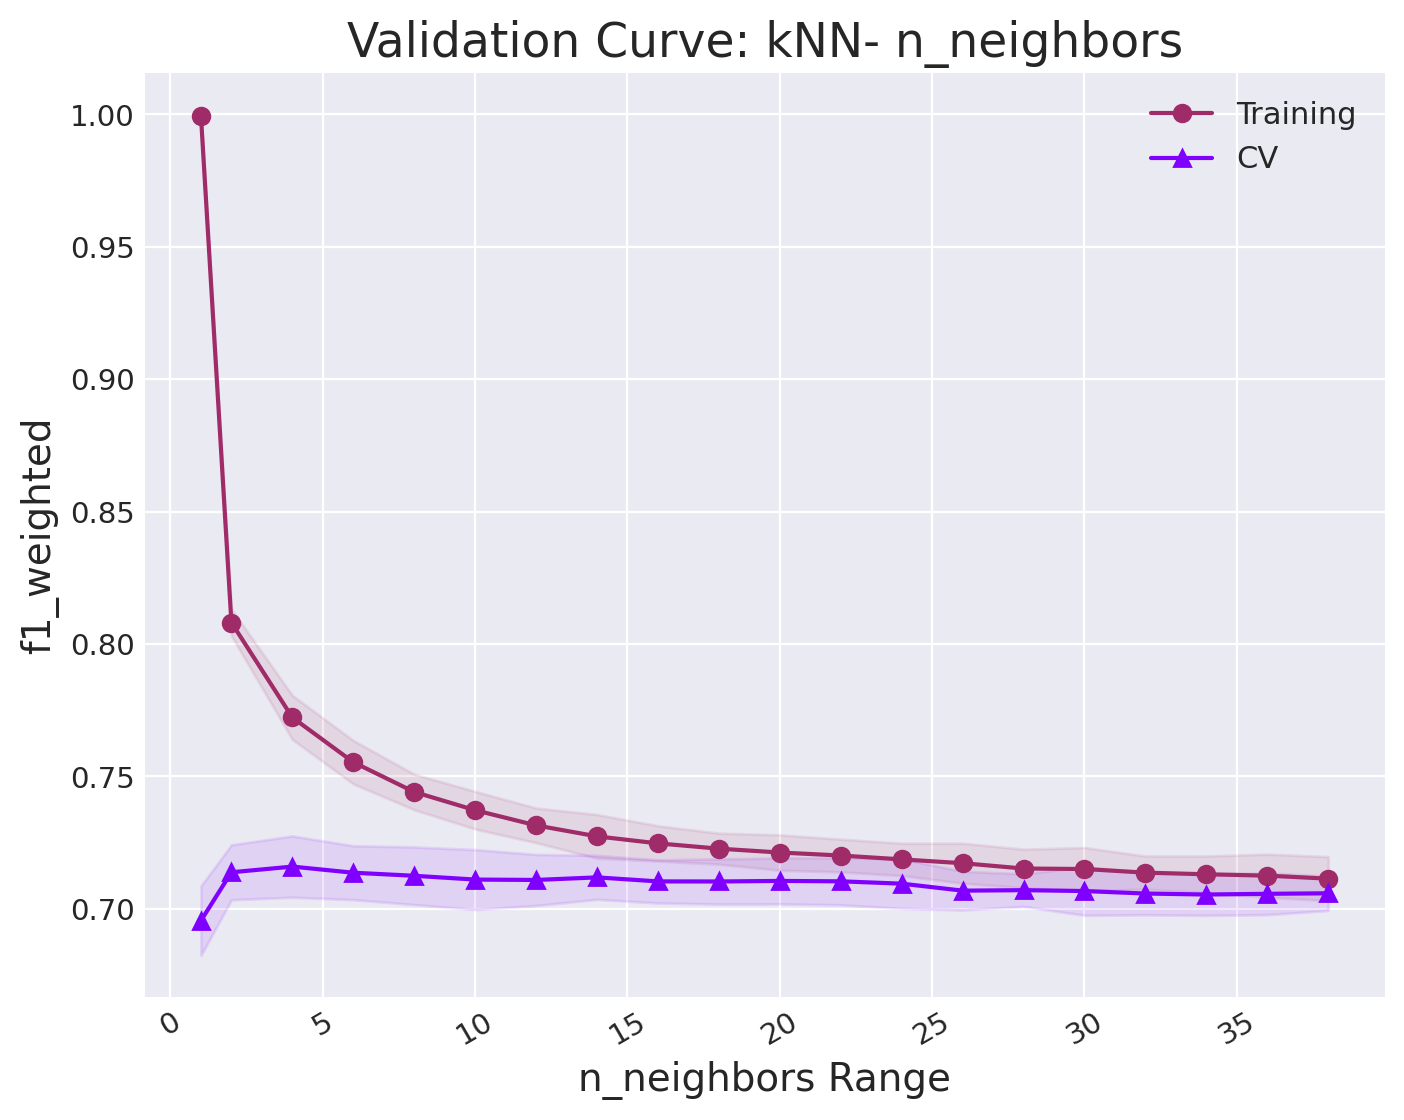

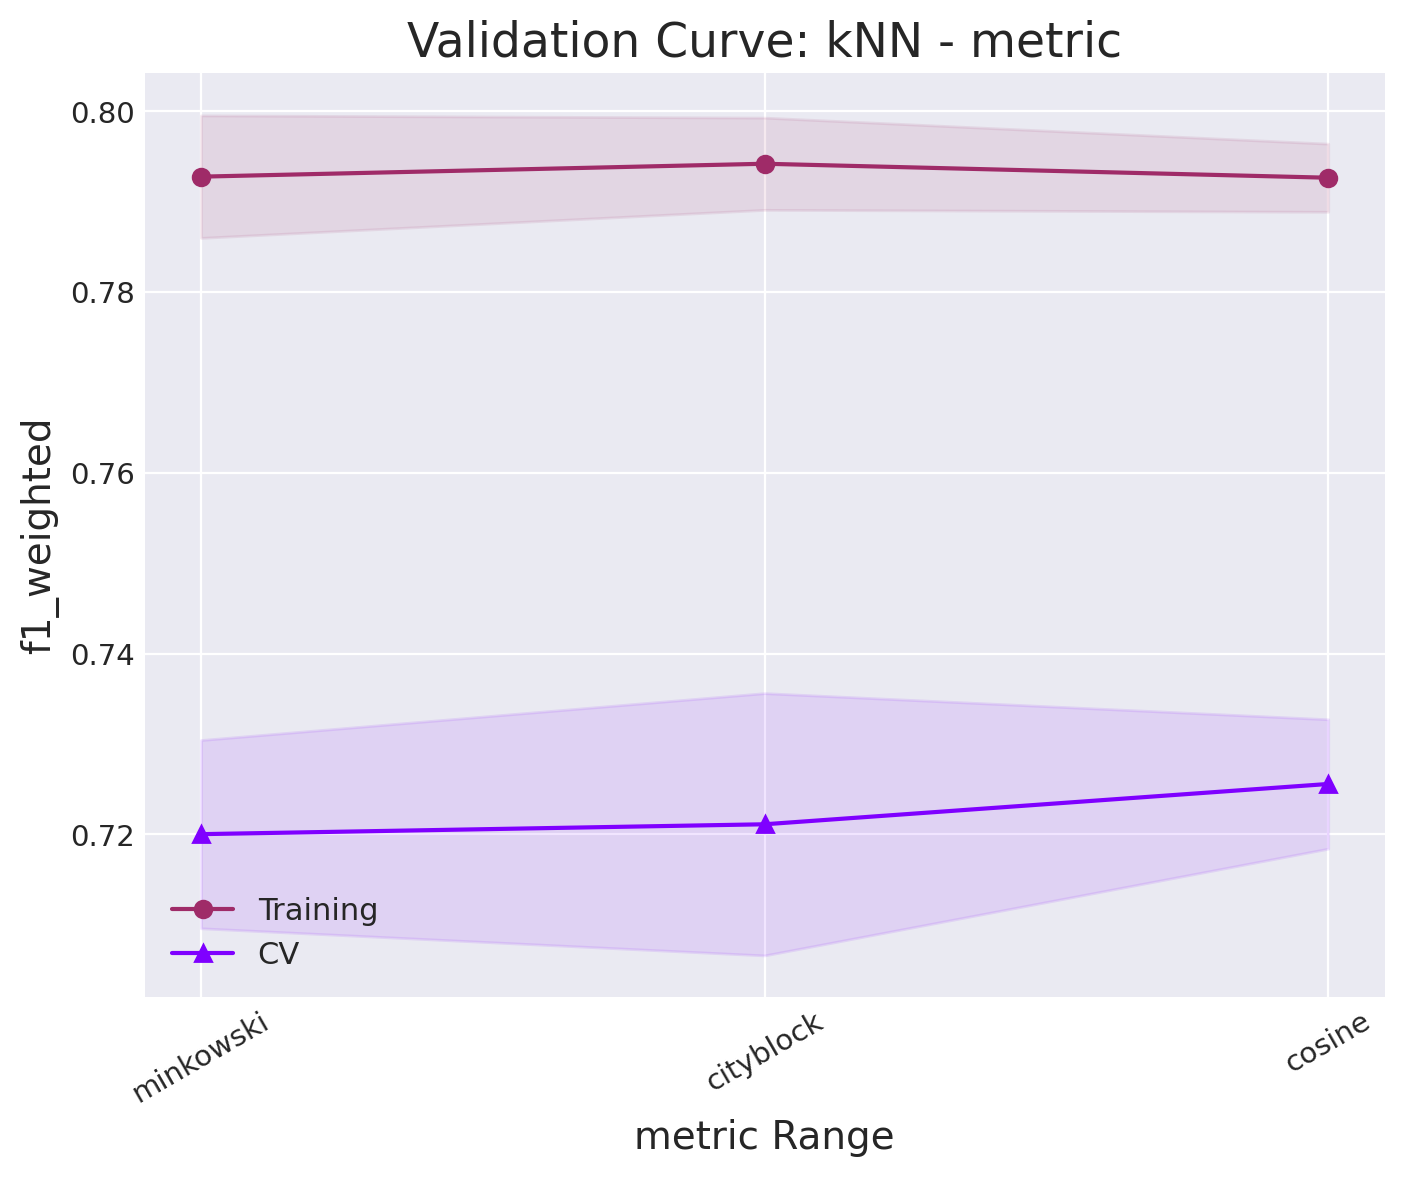

CPU times: user 17min 9s, sys: 5min 55s, total: 23min 4s
Wall time: 3min 8s


In [18]:
%%time
# experiment with max_depth and min sample leaf
n_neighbors_range = list(range(0, 40, 2))
n_neighbors_range[0] = 1
metric_range = ["minkowski", 'cityblock', 'cosine']
train_sizes = np.linspace(0.1, 1, 10)

clf = KNeighborsClassifier()

# plot Learning curve for the default DT
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="kNN - default"
)

# experiment with max depth
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='n_neighbors',
    param_range=n_neighbors_range,
    metric="f1_weighted",
    title="kNN- n_neighbors"
)

# experiment with min samples in leaf node
plot_validation_curve(
    clf,
    X_train.values,
    y_train.values,
    param_name='metric',
    param_range=metric_range,
    metric="f1_weighted",
    title="kNN - metric"
)

In [19]:
%%time
# optimize the kNN by searching n_neighbors between 1 and 10
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ["minkowski", 'cityblock', 'cosine']
    }

tuned_kNN_clf = HalvingGridSearchCV(
   estimator = KNeighborsClassifier(),
   param_grid=param_grid,
   cv=5,
   factor=2
   )
tuned_kNN_clf.fit(X_train, y_train)
print("With HalvingGridSearchCV, best parameters are: \n", tuned_kNN_clf.best_params_)

With HalvingGridSearchCV, best parameters are: 
 {'metric': 'cosine', 'n_neighbors': 10}
CPU times: user 8min 44s, sys: 22min 6s, total: 30min 50s
Wall time: 3min 54s


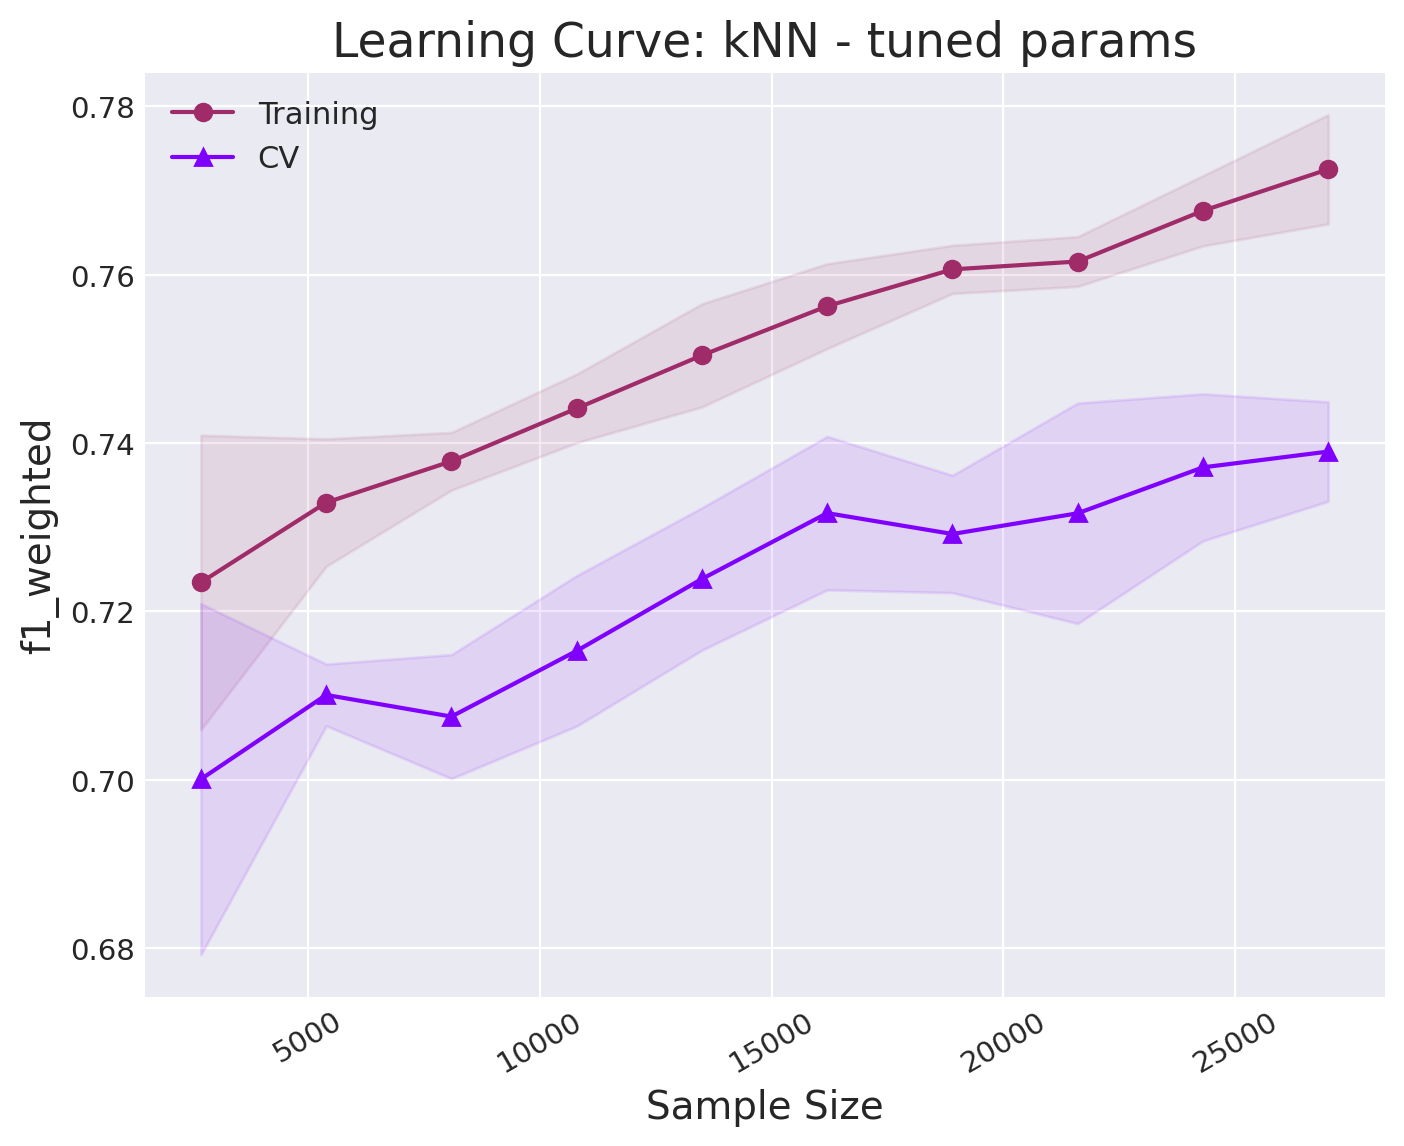

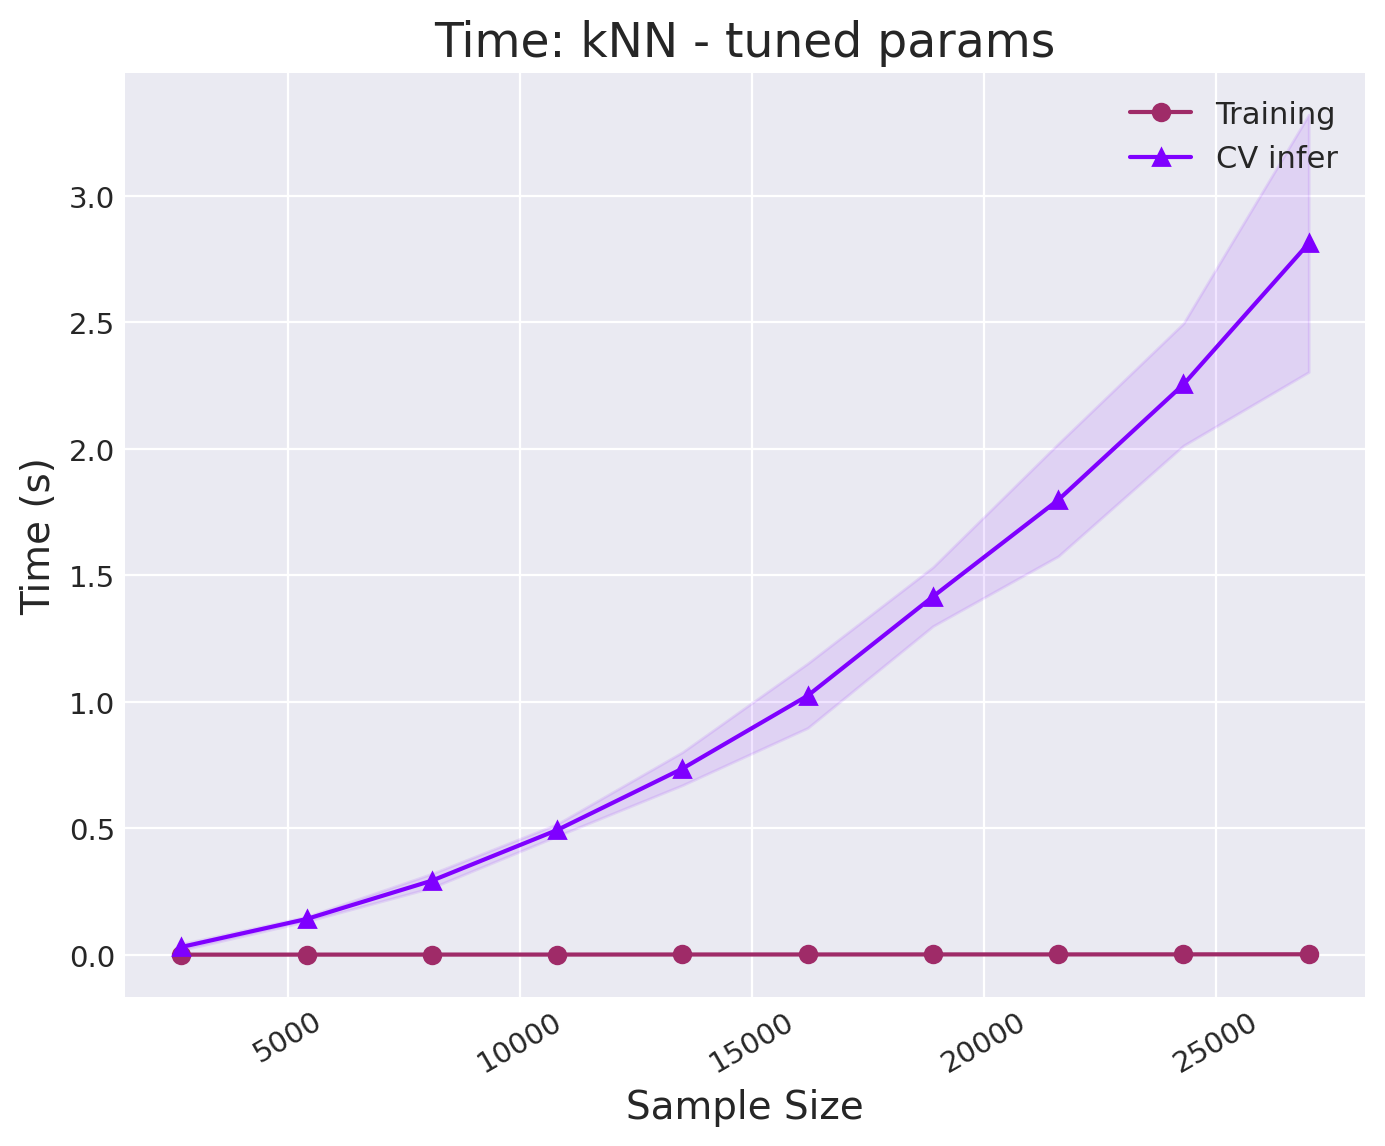

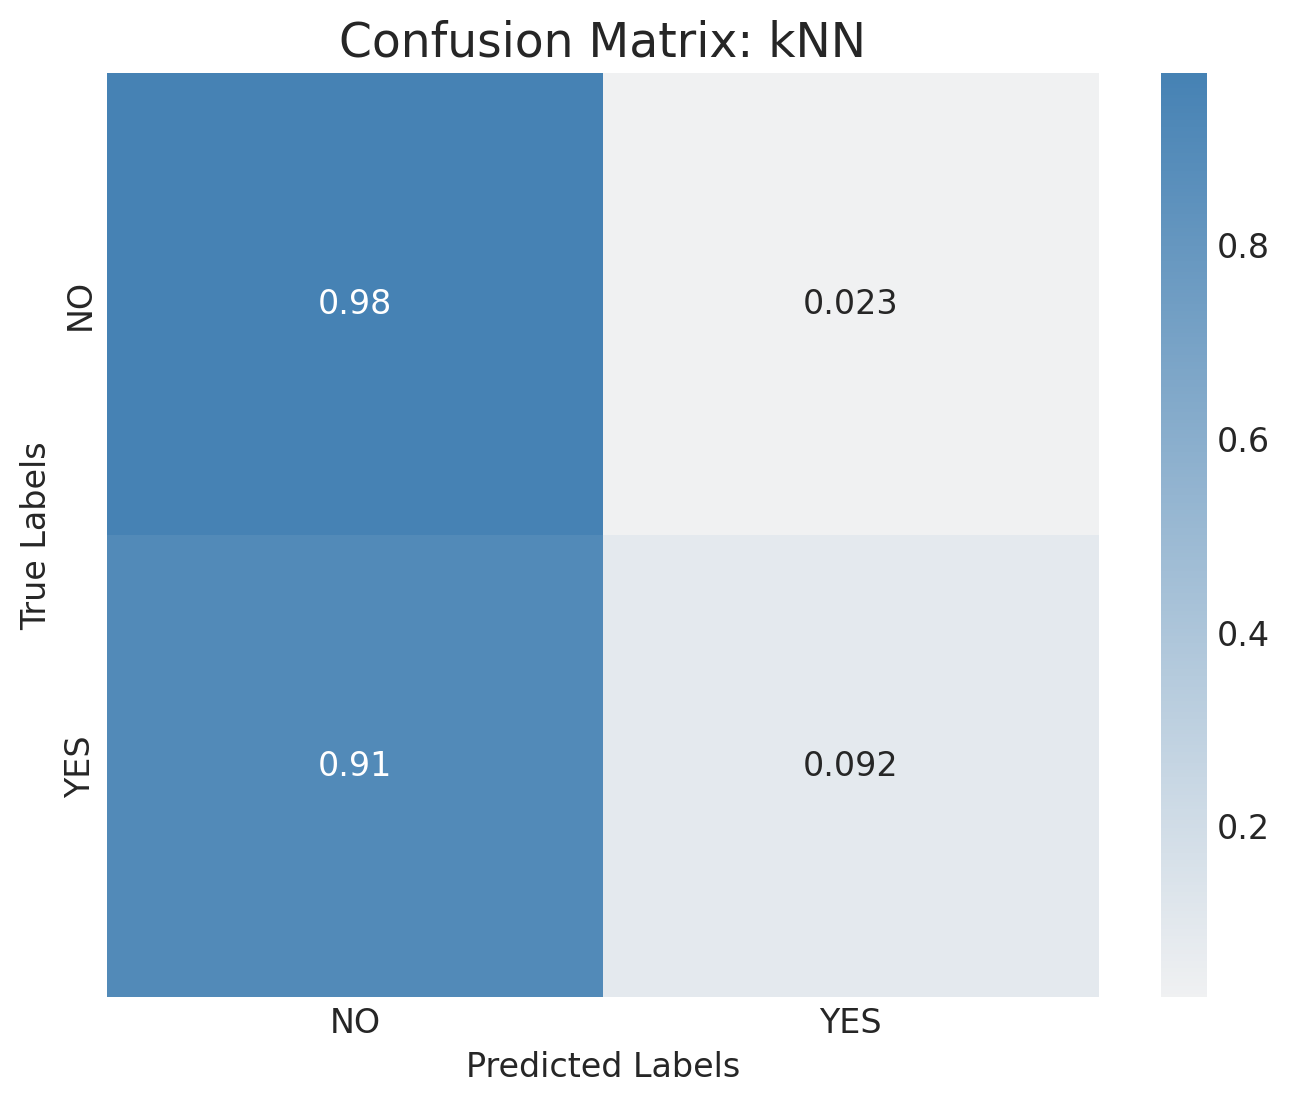

In [20]:
### Train clf on the whole training data and get learning curve
clf = KNeighborsClassifier(
    n_neighbors=tuned_kNN_clf.best_params_['n_neighbors'],
    metric=tuned_kNN_clf.best_params_['metric']
)

# plot Learning curve for the kNN with the (supposedly) optimal params
plot_learning_curve(
    clf,
    X_train.values,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="kNN - tuned params"
)

# fit kNN clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(X_train.values, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(X_test.values)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['NO', 'YES'],
    title="kNN")

MODEL_RES['model_name'].append("kNN")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_kNN_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

<a id='SVC'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> C-Support Vector Classifier  </h1></span>
<a href='#Index'> Back to Index</a>


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

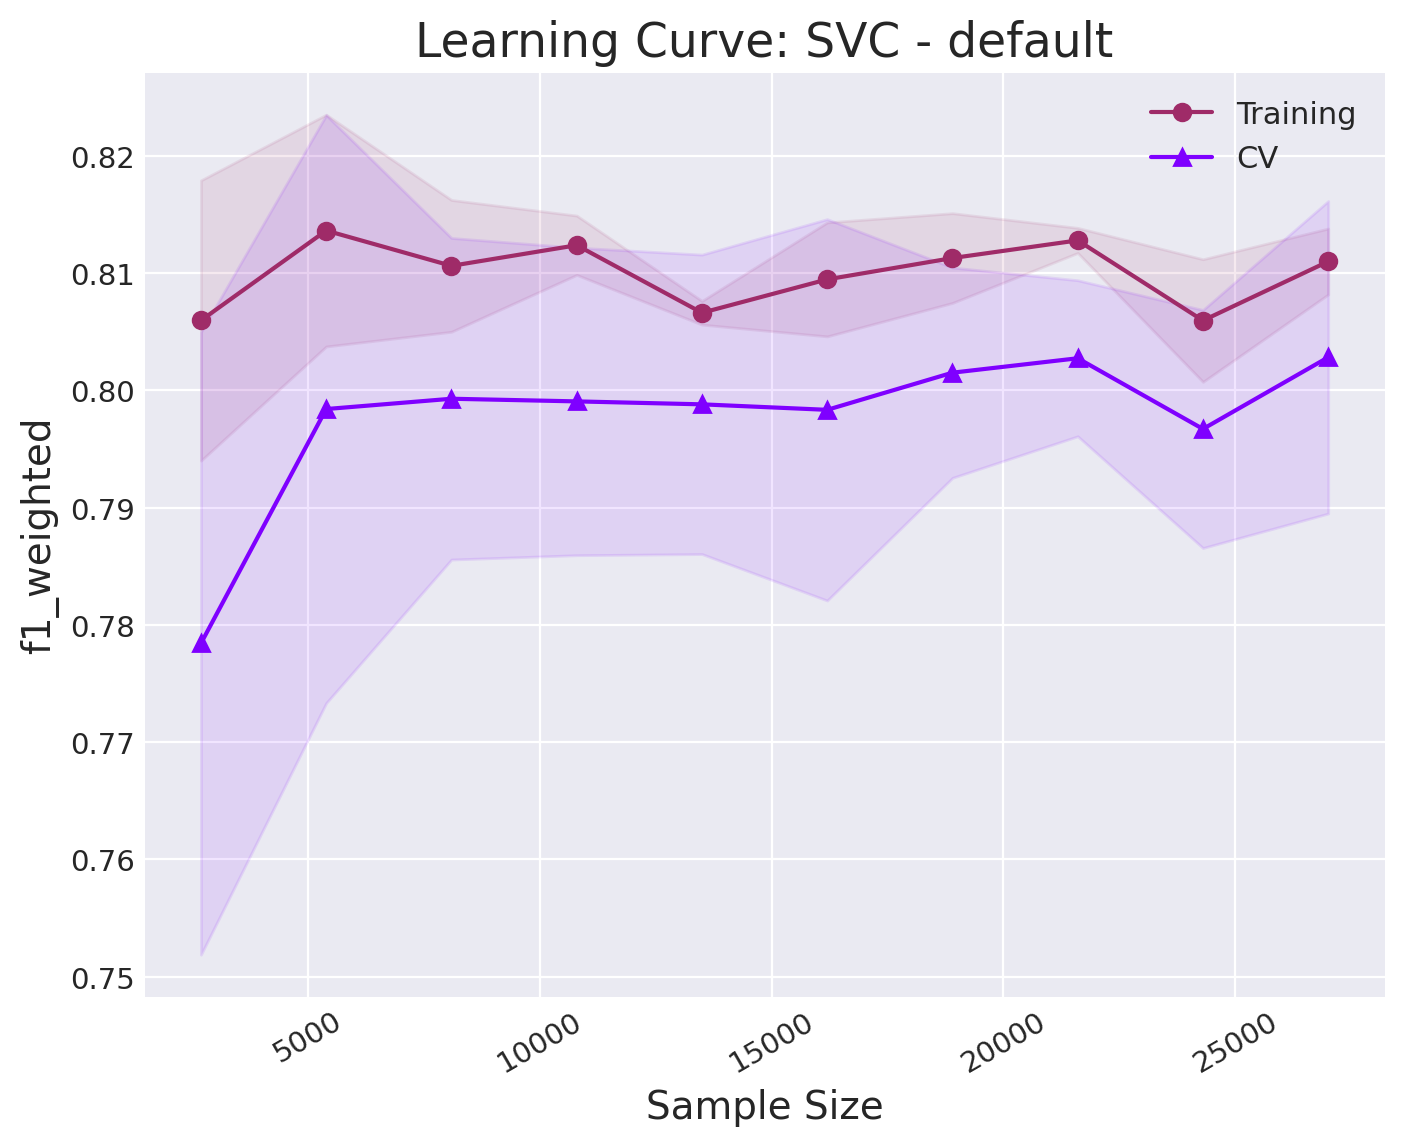

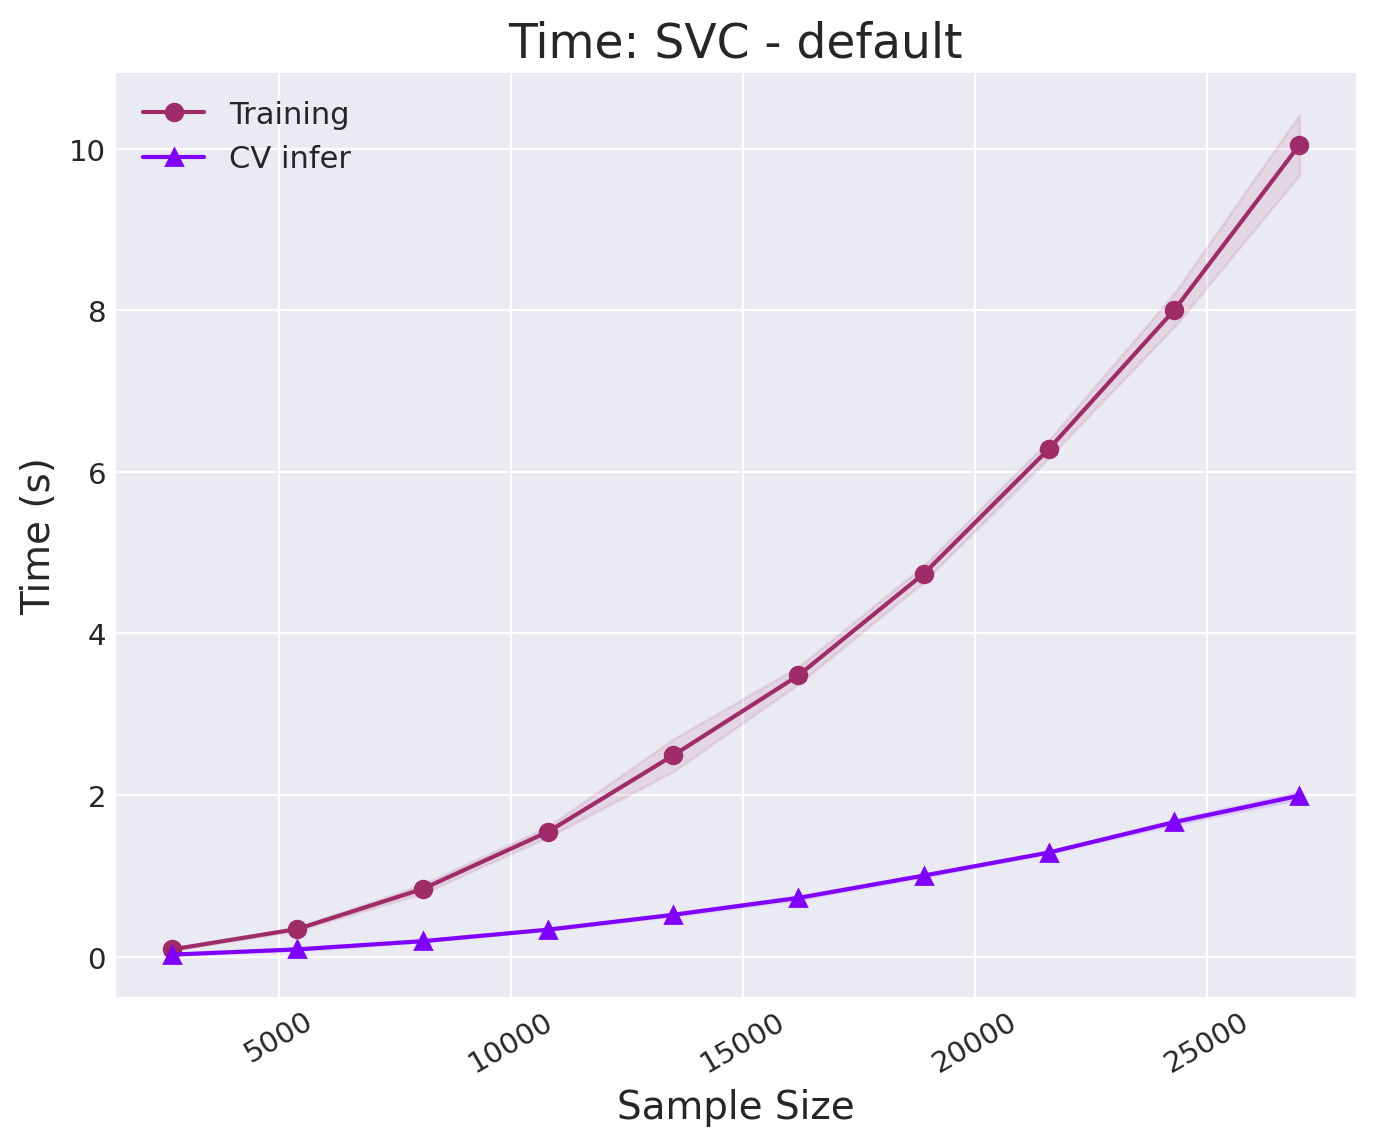

CPU times: user 6min 24s, sys: 1.11 s, total: 6min 25s
Wall time: 6min 25s


In [25]:
%%time
# experiment with regularization and kernel
C_range = np.logspace(0.01, 1, num=10)
kernel_range = ["linear", "poly", "rbf", "sigmoid"]
train_sizes = np.linspace(0.1, 1, 10)

clf = SVC()

# plot Learning curve for the default SVC
plot_learning_curve(
    clf,
    scaled_X_train,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="SVC - default"
)

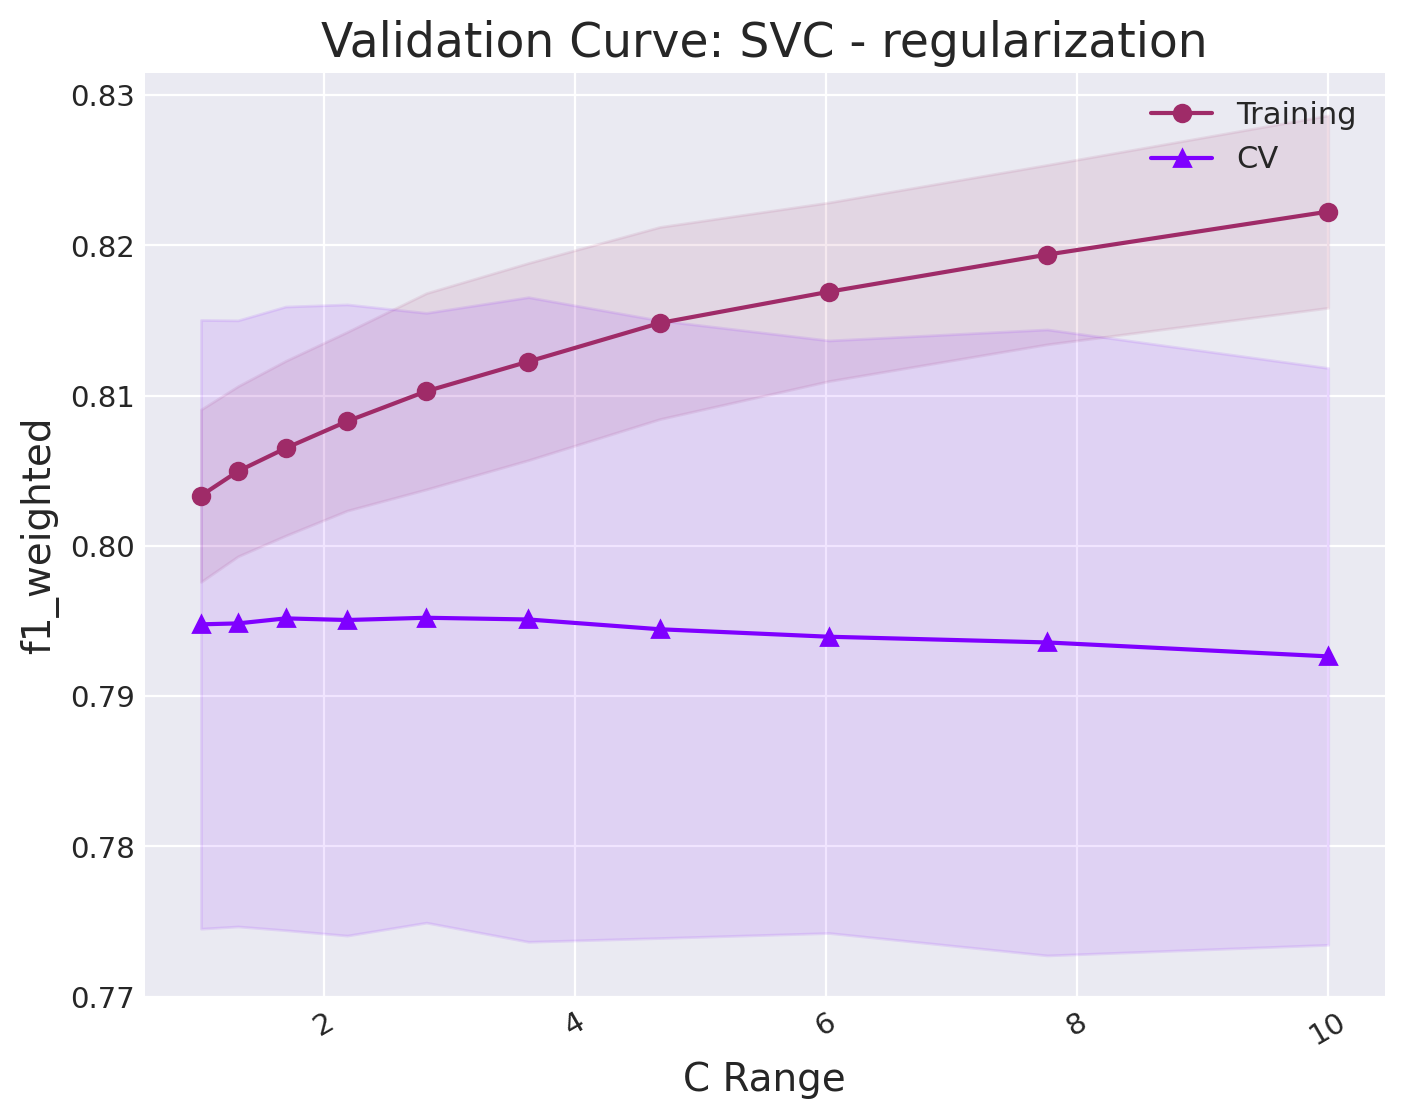

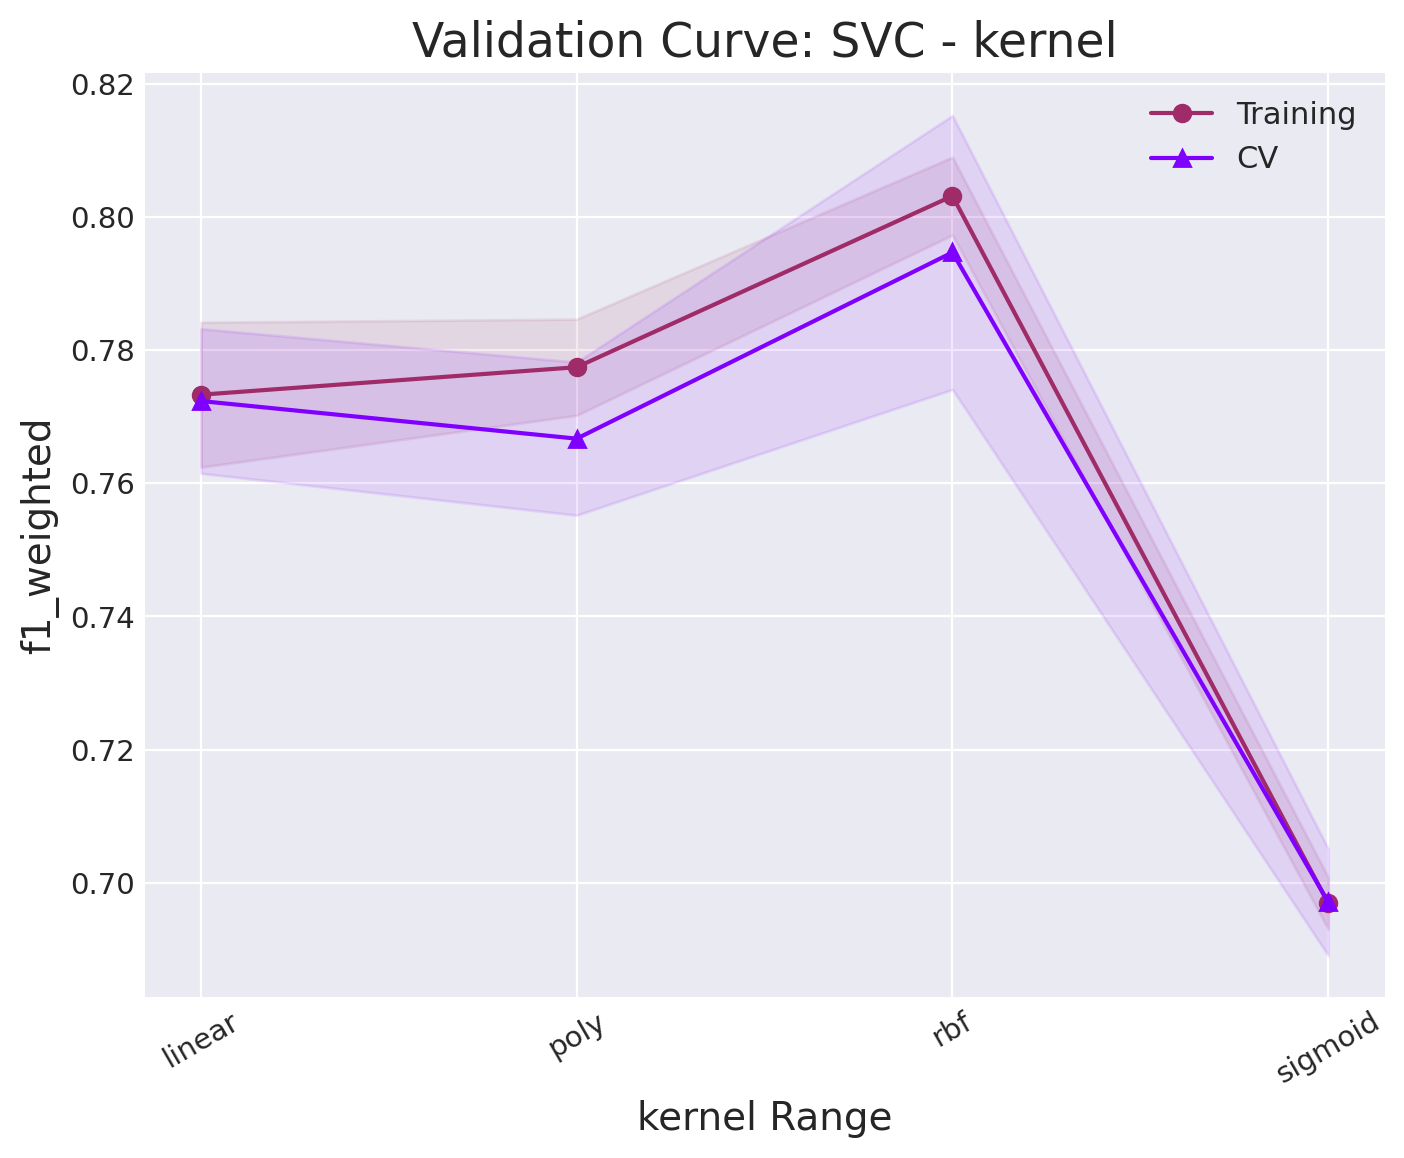

In [27]:
# experiment with regularization
plot_validation_curve(
    clf,
    scaled_X_train,
    y_train.values,
    param_name='C',
    param_range=C_range,
    metric="f1_weighted",
    title="SVC - regularization"
)

# experiment with kernel
plot_validation_curve(
    clf,
    scaled_X_train,
    y_train.values,
    param_name='kernel',
    param_range=kernel_range,
    metric="f1_weighted",
    title="SVC - kernel"
)

In [29]:
%%time
# optimize the SVC
param_grid = {
    'C': C_range,
    'kernel': kernel_range
    }

tuned_svc_clf = HalvingGridSearchCV(
   estimator = SVC(),
   param_grid=param_grid,
   cv=5,
   factor=2
   )
tuned_svc_clf.fit(scaled_X_train, y_train)
print("With HalvingGridSearchCV, best parameters are: \n", tuned_svc_clf.best_params_)

With HalvingGridSearchCV, best parameters are: 
 {'C': 1.318256738556407, 'kernel': 'rbf'}
CPU times: user 7min 20s, sys: 0 ns, total: 7min 20s
Wall time: 7min 20s


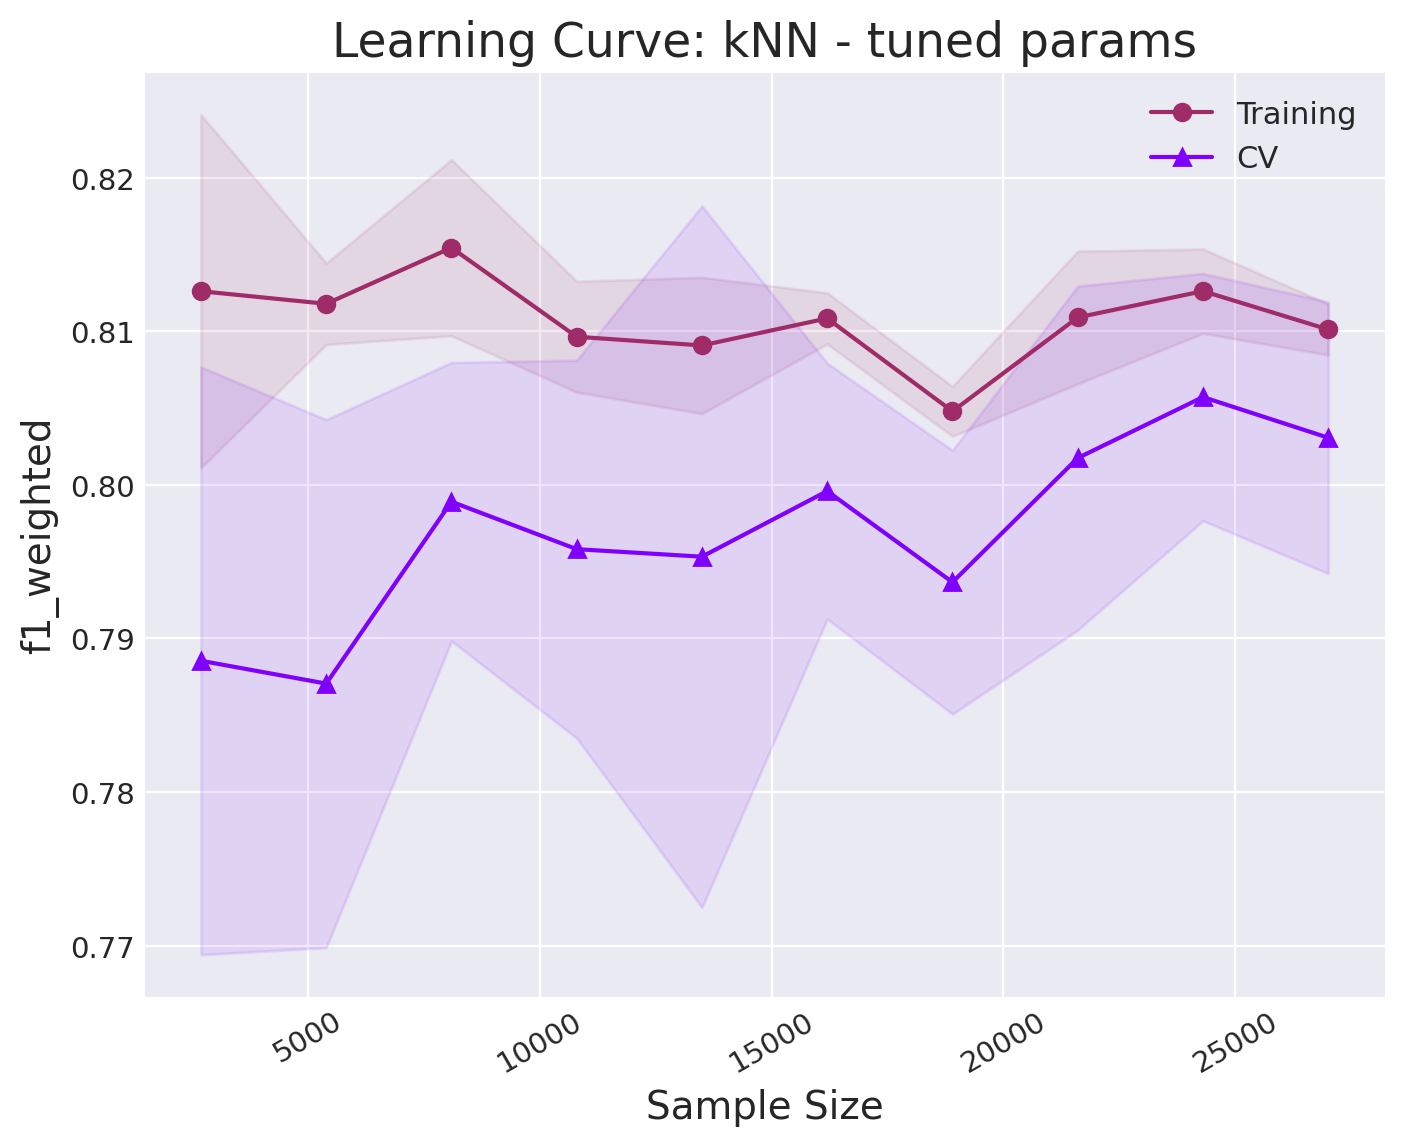

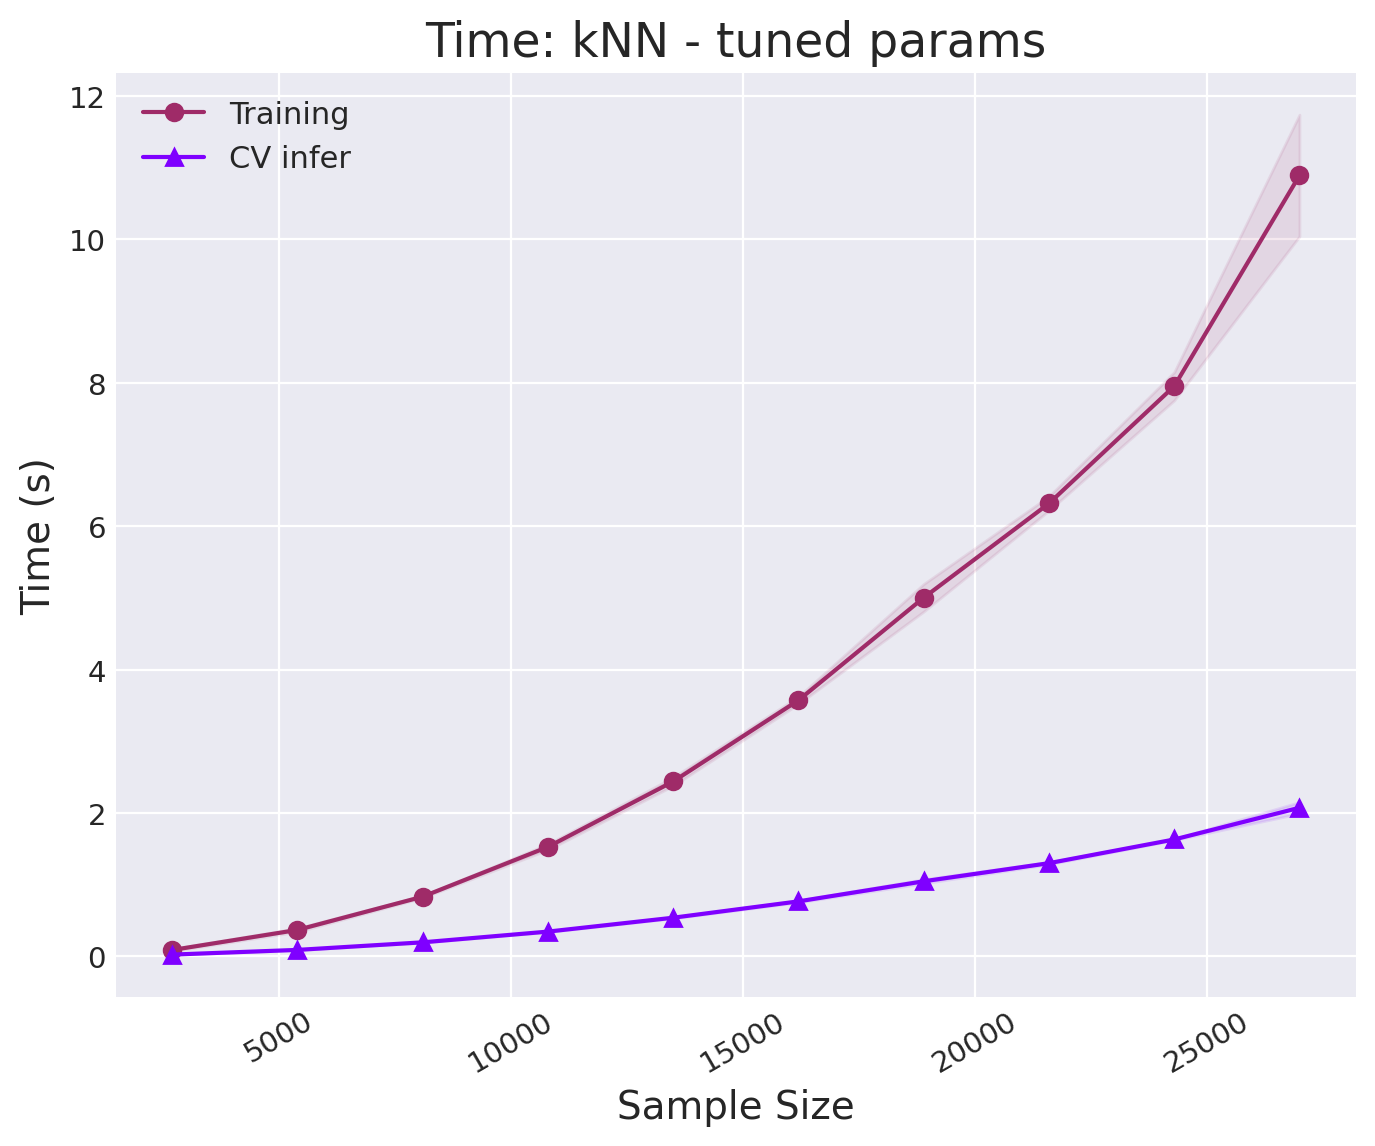

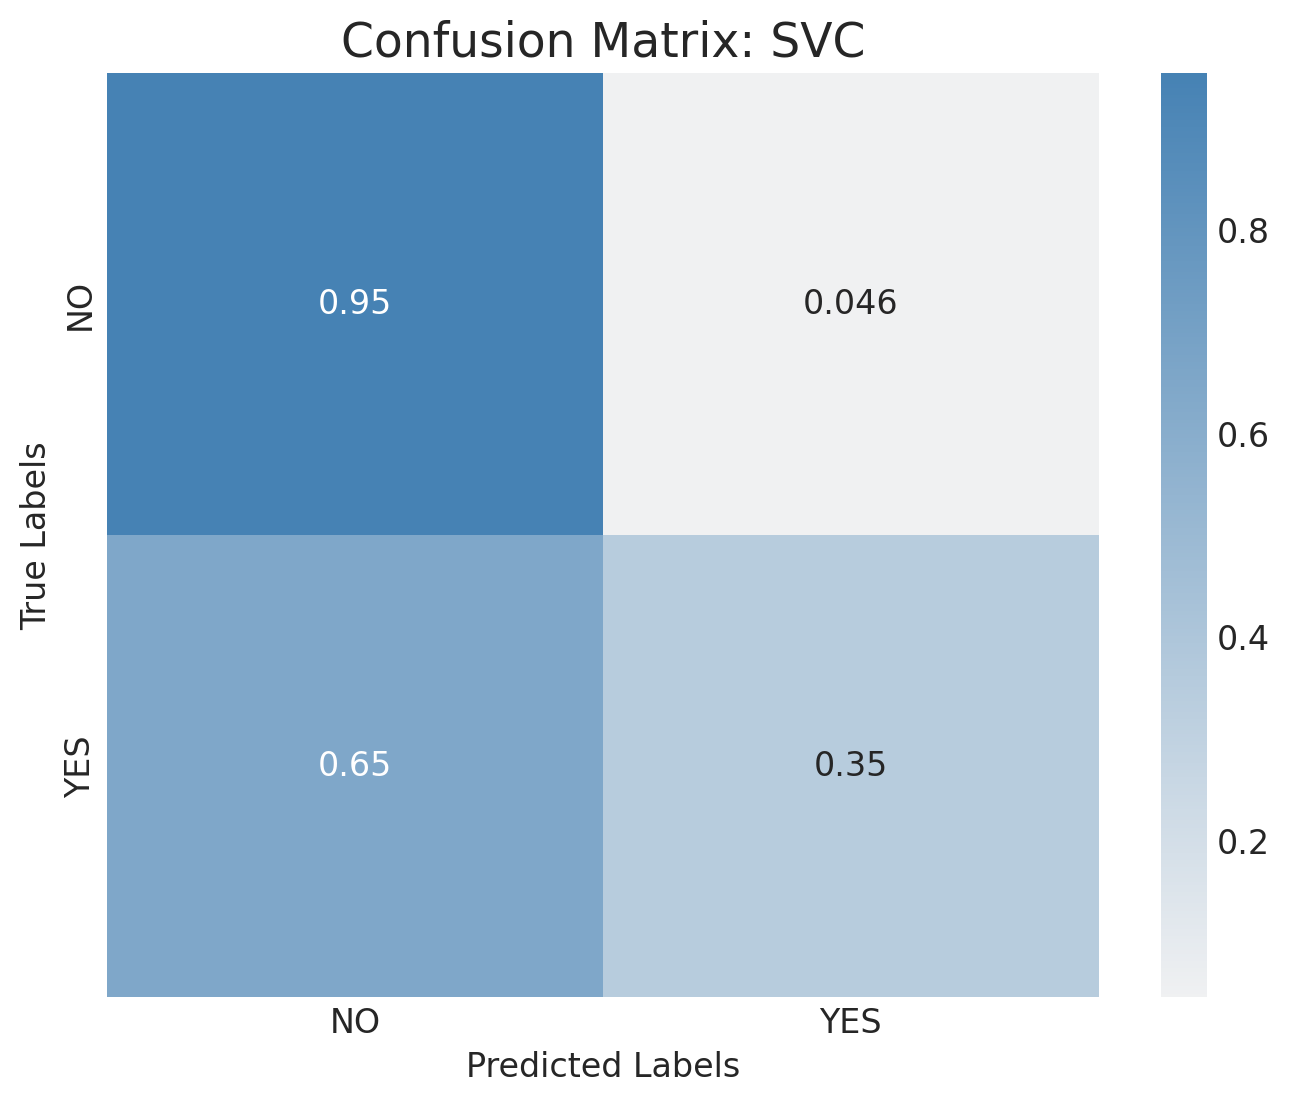

NameError: name 'tuned_SVC_clf' is not defined

In [30]:
### Train clf on the whole training data and get learning curve
clf = SVC(
    C=tuned_svc_clf.best_params_['C'],
    kernel=tuned_svc_clf.best_params_['kernel']
)

# plot Learning curve for the SVC with the (supposedly) optimal params
plot_learning_curve(
    clf,
    scaled_X_train,
    y_train.values,
    train_sizes=train_sizes,
    metric="f1_weighted",
    title="kNN - tuned params"
)

# fit SVC clf on the whole training data and making predictions
train_start_time = time.time()
clf.fit(scaled_X_train, y_train.values)
train_time = time.time() - train_start_time

infer_start_time = time.time()
test_preds = clf.predict(scaled_X_test)
infer_time = time.time() - infer_start_time

metric_score = f1_score(y_true=y_test, y_pred=test_preds, average='weighted')

conf_mat = confusion_matrix(
    y_true=y_test.values,
    y_pred=test_preds,
    labels = [0, 1]
)

plot_confusion_matrix(
    conf_mat=conf_mat,
    normalize=True,
    classes=['NO', 'YES'],
    title="SVC")


In [34]:
MODEL_RES['model_name'].append("SVC")
MODEL_RES['metric_score'].append(metric_score)
MODEL_RES['params'].append(tuned_svc_clf.best_params_)
MODEL_RES['train_time'].append(train_time)
MODEL_RES['infer_time'].append(infer_time)

In [35]:
import pickle

pickle.dump(
    MODEL_RES,
    open("exp_res/credit_card/model_res.p", "wb")
)

In [38]:
final_res = pd.DataFrame.from_dict(MODEL_RES)
final_res.to_csv("exp_res/credit_card/model_res.csv")

In [39]:
final_res

model_name  metric_score  \
0    Pruned Decision Tree      0.789050   
1  Hist-Grad Boosted Tree      0.787700   
2            MLP_logistic      0.666768   
3                MLP_relu      0.679887   
4                     kNN      0.702654   
5                     SVC      0.789316   

                                              params  train_time  infer_time  
0           {'max_depth': 5, 'min_samples_leaf': 38}    0.154687    0.000343  
1                   {'max_bins': 52, 'max_iter': 30}    0.141651    0.002072  
2  {'activation': 'logistic', 'hidden_layer_sizes...    2.492034    0.008032  
3  {'activation': 'logistic', 'hidden_layer_sizes...    2.657637    0.001007  
4            {'metric': 'cosine', 'n_neighbors': 10}    0.002131    1.998672  
5          {'C': 1.318256738556407, 'kernel': 'rbf'}   26.018172    1.395917